# Online Learning Experiments - Group Project

This notebook contains all experiments for the Online Learning project, organized in a modular and scalable way.

## Table of Contents
1. [Setup and Imports](#setup)
2. [Experiment Configuration Framework](#framework)
3. [Task 1.1: UCB1 Simple Pricing](#task1_1)
4. [Task 1.2: Constrained UCB Pricing](#task1_2)
5. [Task 2.1: Combinatorial UCB Multi-Product](#task2_1)
6. [Task 3.1: Primal-Dual Non-Stationary](#task3_1)
7. [Task 4.1: Multi-Product Primal-Dual](#task4_1)
8. [Task 5.1: Sliding Window Non-Stationarity](#task5_1)

## Setup and Imports

In [34]:
%load_ext autoreload
%autoreload 2

print("Autoreload abilitato - i moduli verranno ricaricati automaticamente quando modificati")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Autoreload abilitato - i moduli verranno ricaricati automaticamente quando modificati


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

from environments import *
from agents import *
from data_generators import *
from utils import *
from runner import *
from plotter import *
from scipy.stats import beta

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12

print("Setup completed successfully!")


Setup completed successfully!


## <a id="task1_1"></a>Task 1.1: UCB1 Simple Pricing

Implementation of UCB1 for the pricing problem with uniform valuations.

Task 1.1 - UCB1 Simple Pricing
Prices: [0.2   0.256 0.311 0.367 0.422 0.478 0.553 0.589 0.644 0.7   0.756 0.811
 0.867 0.922 0.98  1.001]

=== Eseguendo esperimento con distribuzione Uniform ===
Running Task 1.1 - UCB1 Simple Pricing (Uniform)
Horizon: 1000000, Trials: 3
Trial 1/3... Sell Probabilities: [ 0.8    0.744  0.689  0.633  0.578  0.522  0.447  0.411  0.356  0.3
  0.244  0.189  0.133  0.078  0.02  -0.001]
Expected Revenues: [ 0.16      0.190464  0.214279  0.232311  0.243916  0.249516  0.247191
  0.242079  0.229264  0.21      0.184464  0.153279  0.115311  0.071916
  0.0196   -0.001001]
Best price index: 5, Expected revenue: 0.249516
✓
Trial 2/3... Sell Probabilities: [ 0.8    0.744  0.689  0.633  0.578  0.522  0.447  0.411  0.356  0.3
  0.244  0.189  0.133  0.078  0.02  -0.001]
Expected Revenues: [ 0.16      0.190464  0.214279  0.232311  0.243916  0.249516  0.247191
  0.242079  0.229264  0.21      0.184464  0.153279  0.115311  0.071916
  0.0196   -0.001001]
Best price index: 5,

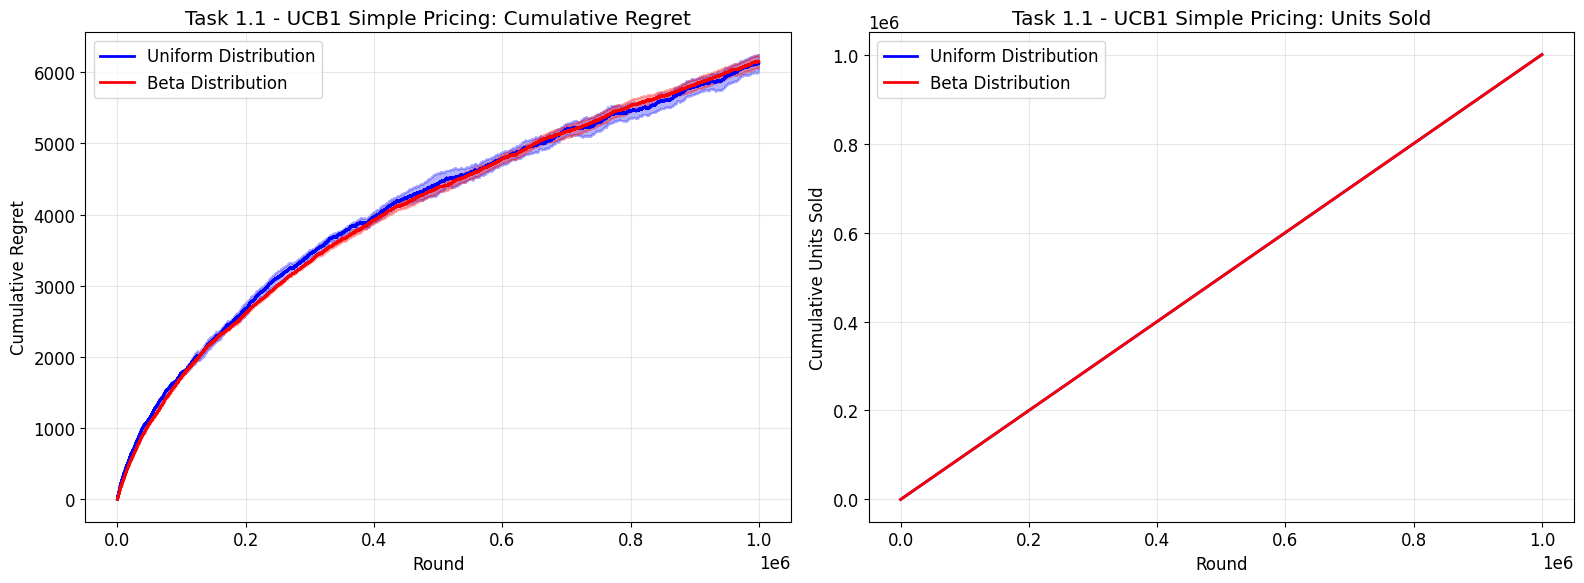


=== ANALISI DETTAGLIATA ===

--- Distribuzione Uniform ---

RESULTS FOR Task 1.1 - UCB1 Simple Pricing (Uniform)
Execution time: 19.52 seconds
Completed rounds: 1000000
Average regret per round: 0.006121
Average final reward: 243395.44 ± 206.91
Efficiency vs clairvoyant: 97.5%
Average units sold: 1000000.00/1000.0 (100000.0%)
Empirical average rewards: [0.1612 0.1896 0.2137 0.2335 0.2429 0.2493 0.2481 0.2422 0.2279 0.2125
 0.1832 0.1624 0.1161 0.064  0.0296 0.    ]

--- Distribuzione Beta ---

RESULTS FOR Task 1.1 - UCB1 Simple Pricing (Beta)
Execution time: 20.54 seconds
Completed rounds: 1000000
Average regret per round: 0.006148
Average final reward: 72141.26 ± 156.79
Efficiency vs clairvoyant: 92.1%
Average units sold: 1000000.00/1000.0 (100000.0%)
Empirical average rewards: [0.0744 0.0782 0.0777 0.0741 0.0686 0.0614 0.0477 0.0431 0.0369 0.0262
 0.0177 0.0121 0.007  0.002  0.0003 0.    ]

=== CONFRONTO FINALE ===
Uniform: Final Average Regret = 6120.5630, Final Average Reward = 24

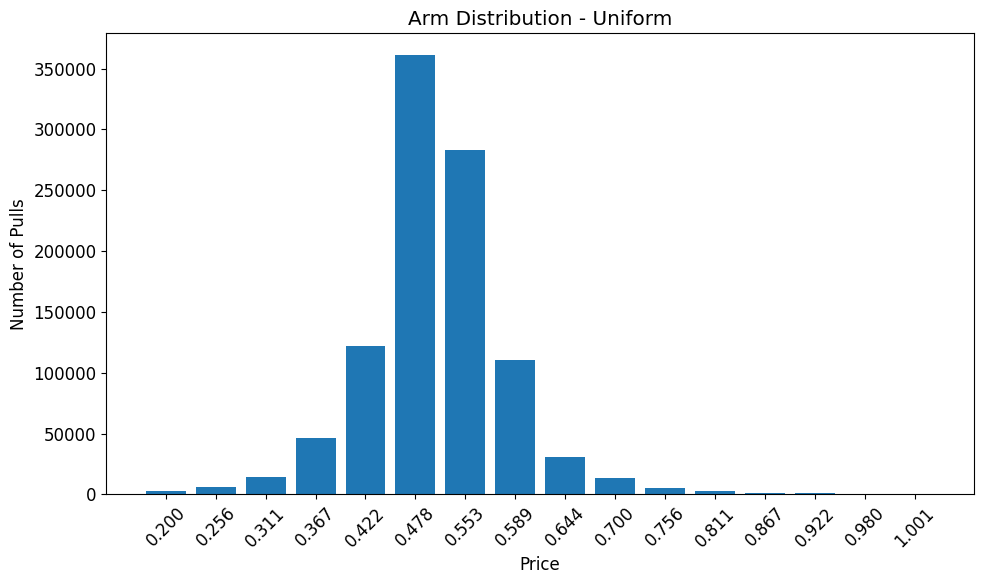

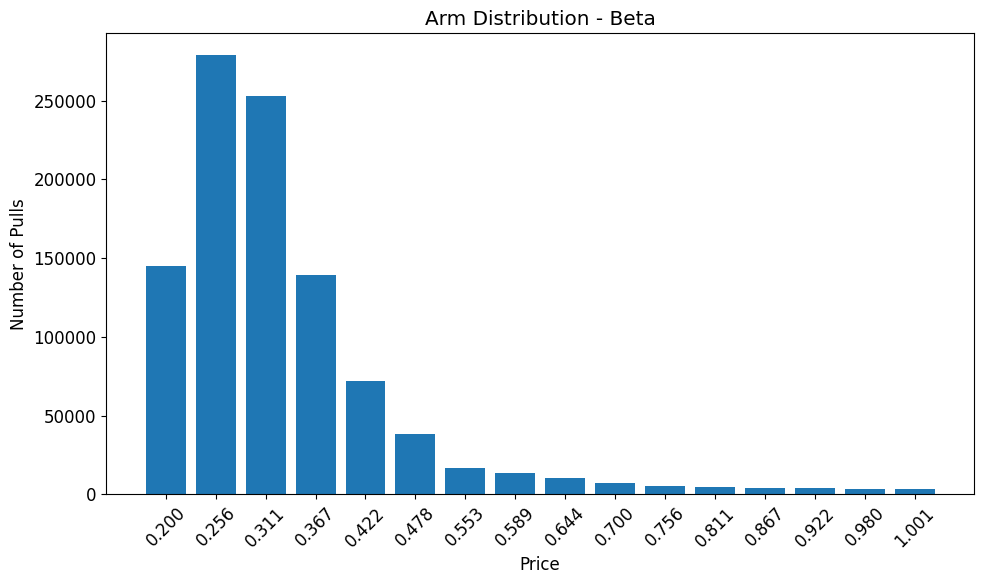

In [ ]:
class Task1_1_Runner(StandardExperimentRunner):
    """UCB1 Simple Pricing experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.prices = config.prices
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = PricingEnvironment(
            self.prices, self.config.horizon, rng=rng, distribution=self.distribution)
        return self.env

    def create_agent(self):
        self.agent = UCB1PricingAgent(len(self.prices), self.config.horizon)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        if self.distribution == Distribution.UNIFORM:
            self.probabilities = 1 - self.prices
        elif self.distribution == Distribution.BETA_SINUSOIDAL:
            self.probabilities = 1 - beta.cdf(self.prices, 0.5, 2)
        else:
            raise ValueError(f"Distribution {self.distribution} not supported")
        print(f"Sell Probabilities: {self.probabilities}")
        self.expected_revenues = self.prices * self.probabilities
        print(f"Expected Revenues: {self.expected_revenues}")
        self.best_idx = np.argmax(self.expected_revenues)
        print(f"Best price index: {self.best_idx}, Expected revenue: {self.expected_revenues[self.best_idx]}")
        self.clairvoyant_reward_per_round = self.expected_revenues[self.best_idx]

        return self.clairvoyant_reward_per_round

    def extract_metrics(self, result) -> tuple[float, float]:
        return float(result), 1.0


price_grid = create_default_prices()
config = ExperimentConfig(
    task_name="Task 1.1 - UCB1 Simple Pricing",
    horizon=1_000_000,
    n_trials=3,
    seed=18,
    prices=price_grid,
    distribution=[Distribution.UNIFORM, Distribution.BETA_SINUSOIDAL],
)

print(f"Task 1.1 - UCB1 Simple Pricing")
print(f"Prices: {price_grid}")

# Esegui gli esperimenti
multi_runner = MultiDistributionRunner(Task1_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=False)

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## <a id="task1_2"></a>Task 1.2: Constrained UCB Pricing

Implementation of Constrained UCB for pricing with budget constraints.


Task 1.2 - Constrained UCB Pricing
Prices: 16 prices from 0.200 to 0.980
Budget: 80000, Horizon: 100000

=== Eseguendo esperimento con distribuzione Beta ===
Running Task 1.2 - Constrained UCB Pricing (Beta)
Horizon: 100000, Trials: 1
Trial 1/1... Sell Probabilities Beta : [3.73900966e-01 3.05816808e-01 2.50207657e-01 2.02457389e-01
 1.62645916e-01 1.28175569e-01 9.01568299e-02 7.48229265e-02
 5.46595872e-02 3.78409695e-02 2.44405174e-02 1.43421320e-02
 6.95161712e-03 2.34356515e-03 1.51011402e-04 0.00000000e+00]
Expected utility: 0.0783
Optimal distribution (gamma): [ 0.  1. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Expected cost: 0.3058
✓
Sell Probabilities Beta : [3.73900966e-01 3.05816808e-01 2.50207657e-01 2.02457389e-01
 1.62645916e-01 1.28175569e-01 9.01568299e-02 7.48229265e-02
 5.46595872e-02 3.78409695e-02 2.44405174e-02 1.43421320e-02
 6.95161712e-03 2.34356515e-03 1.51011402e-04 0.00000000e+00]
Expected utility: 0.0783
Optimal distribution (gamma): [ 0.  1. -

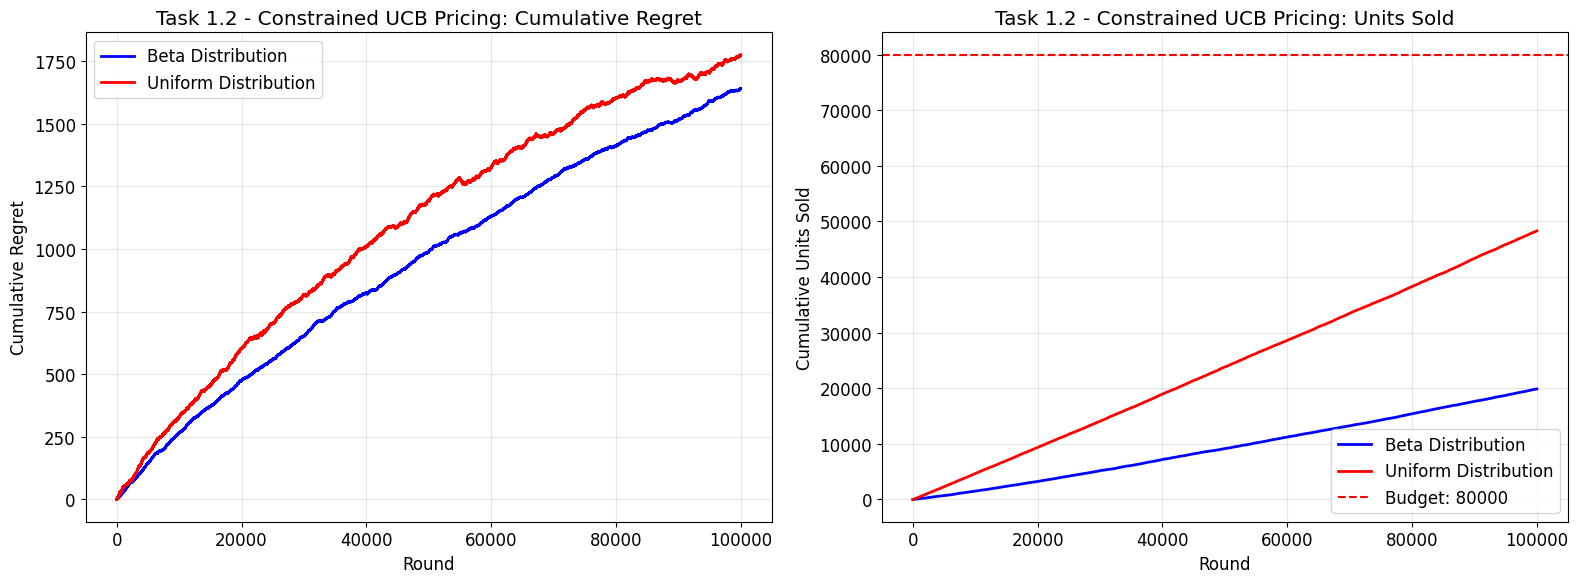


=== ANALISI DETTAGLIATA ===

--- Distribuzione Beta ---

RESULTS FOR Task 1.2 - Constrained UCB Pricing (Beta)
Execution time: 210.93 seconds
Completed rounds: 100000
Average regret per round: 0.016395
Average final reward: 6189.42 ± 0.00
Efficiency vs clairvoyant: 79.1%
Average units sold: 19868.00/80000 (24.8%)

--- Distribuzione Uniform ---

RESULTS FOR Task 1.2 - Constrained UCB Pricing (Uniform)
Execution time: 215.95 seconds
Completed rounds: 100000
Average regret per round: 0.017745
Average final reward: 23177.06 ± 0.00
Efficiency vs clairvoyant: 92.9%
Average units sold: 48286.00/80000 (60.4%)

=== CONFRONTO FINALE ===
Beta: Final Average Regret = 1639.4903, Final Average Reward = 6189.4200
Uniform: Final Average Regret = 1774.5390, Final Average Reward = 23177.0610


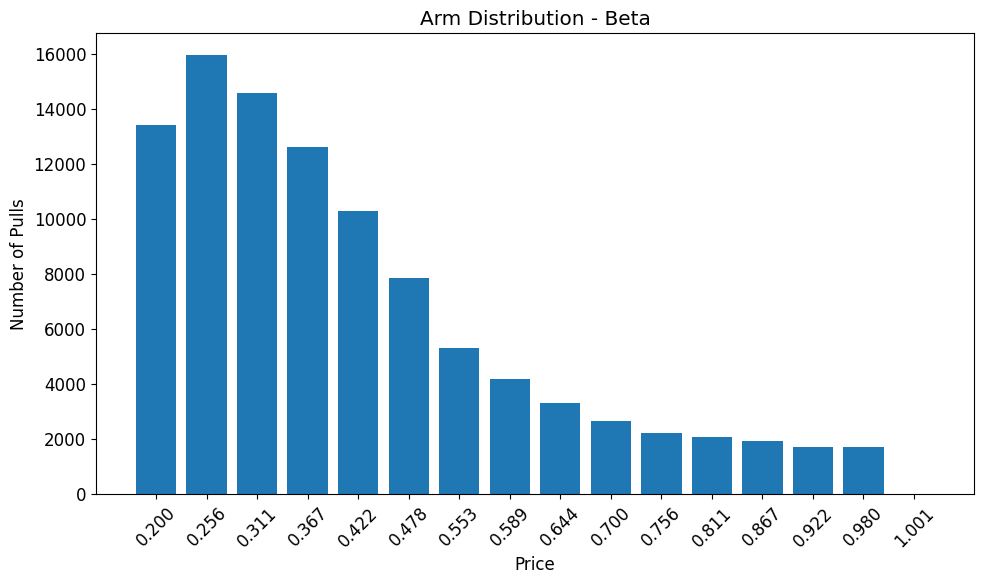

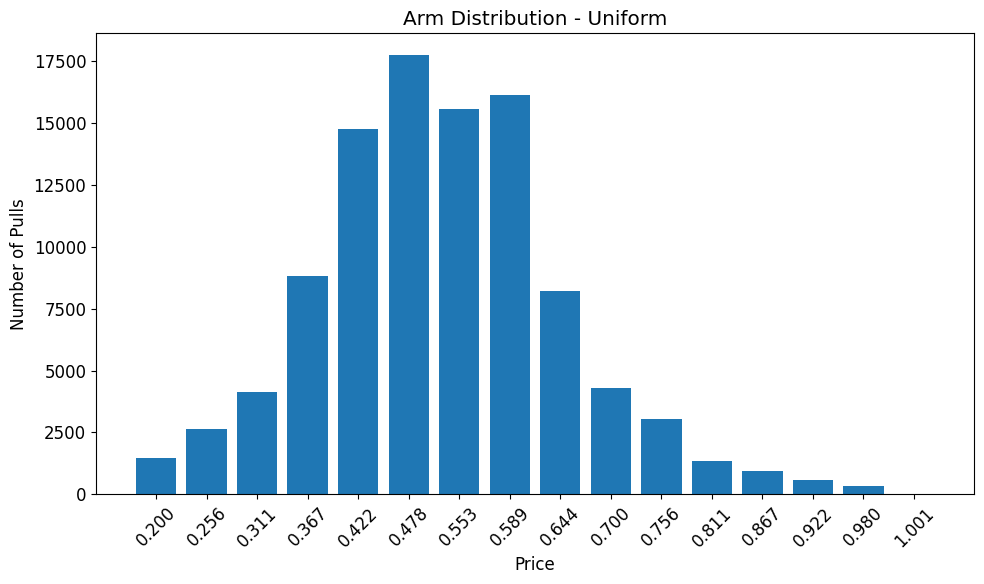

In [ ]:
class Task1_2_Runner(StandardExperimentRunner):
    """Constrained UCB Pricing experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.prices = config.prices
        self.distribution = config.distribution
        self.adaptive_rho = config.adaptive_rho

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = BudgetedPricingEnvironment(
            self.prices, self.config.horizon, rng=rng, distribution=self.distribution)
        return self.env

    def create_agent(self):
        self.agent = ConstrainedUCBPricingAgent(
            len(self.prices), self.config.budget, self.config.horizon, alpha=2, adaptive_rho=self.adaptive_rho)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        if self.distribution == Distribution.UNIFORM:
            self.sell_probabilities = np.maximum(0, 1 - self.prices)
            print(f"Sell Probabilities Uniform : {self.sell_probabilities}")
        elif self.distribution == Distribution.BETA_SINUSOIDAL:
            self.sell_probabilities = 1 - beta.cdf(self.prices, 0.5, 2)
            print(f"Sell Probabilities Beta : {self.sell_probabilities}")
        else:
            raise ValueError(f"Distribution {self.distribution} not supported")
        
        self.expected_reward = self.prices * self.sell_probabilities
        self.exp_util, self.gamma, self.exp_cost = compute_clairvoyant_single_product(
            self.prices, self.sell_probabilities, self.config.budget, self.config.horizon
        )

        return self.exp_util

    def extract_metrics(self, result) -> tuple[float, float]:
        return float(result[0]), float(result[1])


price_grid = create_default_prices()
config = ExperimentConfig(
    task_name="Task 1.2 - Constrained UCB Pricing",
    horizon=100_000,
    n_trials=1,
    seed=18,
    budget=40_000,
    prices=price_grid,
    distribution=[Distribution.BETA_SINUSOIDAL, Distribution.UNIFORM],
    adaptive_rho=False
)

print("Task 1.2 - Constrained UCB Pricing")
print(
    f"Prices: {len(price_grid)} prices from {price_grid[0]:.3f} to {price_grid[-2]:.3f}")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")

multi_runner = MultiDistributionRunner(Task1_2_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True)

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## <a id="task2_1"></a>Task 2.1: Combinatorial UCB Multi-Product

Implementation of Constrained Combinatorial UCB for multi-product pricing with shared budget.


In [ ]:
class Task2_1_Runner(StandardExperimentRunner):
    """Combinatorial UCB Multi-Product experiment runner"""
    
    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.n_products = config.n_products
        self.distribution = config.distribution
        self.price_grid = [np.concatenate([config.prices, [1.001]]) for _ in range(self.n_products)]
        
    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = MultiProductPricingEnvironment(self.price_grid, self.config.horizon, rng=rng, distribution=self.distribution)
        return self.env
        
    def create_agent(self):
        self.agent = ConstrainedCombinatorialUCBAgent(self.price_grid, self.config.budget, self.config.horizon, alpha=2)
        return self.agent
        
    def compute_clairvoyant_reward(self) -> float:
        if self.distribution == Distribution.UNIFORM:
            f_true = [prices * np.maximum(0, (1 - prices)) for prices in self.price_grid]
            c_true = [np.maximum(0, 1 - prices) for prices in self.price_grid]
        elif self.distribution == Distribution.BETA_SINUSOIDAL:
            f_true = [prices * (1 - beta.cdf(prices, 0.5, 2)) for prices in self.price_grid]
            c_true = [1 - beta.cdf(prices, 0.5, 2) for prices in self.price_grid]
        else:
            raise ValueError(f"Distribution {self.distribution} not supported")

        self.clair_reward, self.simplex = solve_clairvoyant_lp(self.price_grid, self.config.budget, self.config.horizon, f_true, c_true)

        return self.clair_reward
        
    def extract_metrics(self, result) -> tuple[float, float]:
        rewards, costs = result
        return float(np.sum(rewards)), float(np.sum(costs))

n_products = 3
price_grid = create_default_prices()

config = ExperimentConfig(
    task_name="Task 2.1 - Combinatorial UCB Multi-Product",
    horizon=200_000,
    n_trials=1,
    seed=18,
    budget=300_000,
    prices=price_grid,
    n_products=n_products,
    distribution=[Distribution.BETA_SINUSOIDAL , Distribution.UNIFORM]
)

print(f"Task 2.1 - Combinatorial UCB Multi-Product")
print(f"Products: {n_products}, Prices per product: {len(price_grid)}")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")

multi_runner = MultiDistributionRunner(Task2_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

Task 2.1 - Combinatorial UCB Multi-Product
Products: 3, Prices per product: 16
Budget: 400000, Horizon: 200000

=== Eseguendo esperimento con distribuzione Beta ===
Running Task 2.1 - Combinatorial UCB Multi-Product (Beta)
Horizon: 200000, Trials: 1
Trial 1/1... Expected cost: 0.9175


RuntimeError: LP failed: The HiGHS status code was not recognized. (HiGHS Status 15: model_status is Unknown; primal_status is Feasible)

## <a id="task3_1"></a>Task 3.1: Primal-Dual Non-Stationary Pricing

Implementation of Full-Feedback Primal-Dual for non-stationary environments with adversarial shocks.


Task 3.1 - Primal-Dual Non-Stationary Pricing
Budget: 6000, Horizon: 20000
Shock probability: 0.5, Frequency: 300
Prices: 16 from 0.200 to 0.980

=== Eseguendo esperimento con distribuzione Beta ===
Running Task 3.1 - Primal-Dual Non-Stationary Pricing (Beta)
Horizon: 20000, Trials: 1
Trial 1/1... Expected utility: 0.1985
Optimal distribution (gamma): [0.         0.         0.         0.         0.         0.
 0.         0.         0.63858268 0.36141732 0.         0.
 0.         0.         0.         0.        ]
Expected cost: 0.3000
✓
Expected utility: 0.1985
Optimal distribution (gamma): [0.         0.         0.         0.         0.         0.
 0.         0.         0.63858268 0.36141732 0.         0.
 0.         0.         0.         0.        ]
Expected cost: 0.3000
Esperimento Beta completato

=== Eseguendo esperimento con distribuzione Sinusoidal ===
Running Task 3.1 - Primal-Dual Non-Stationary Pricing (Sinusoidal)
Horizon: 20000, Trials: 1
Trial 1/1... Expected utility: 0.068

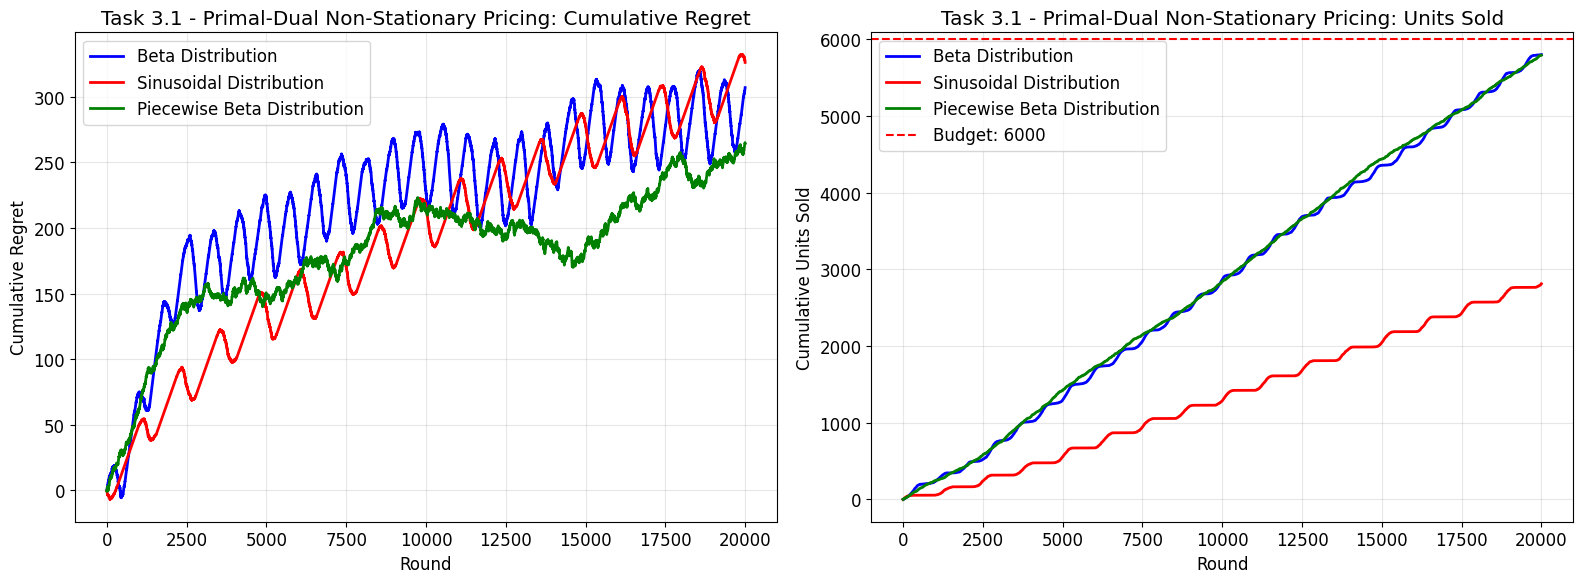


=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===

Plot per distribuzione Beta:


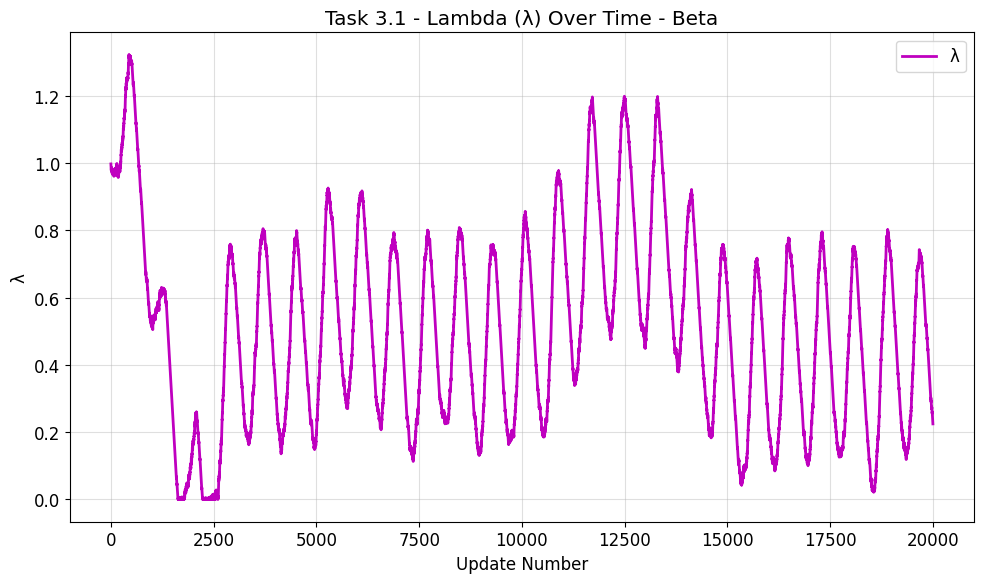

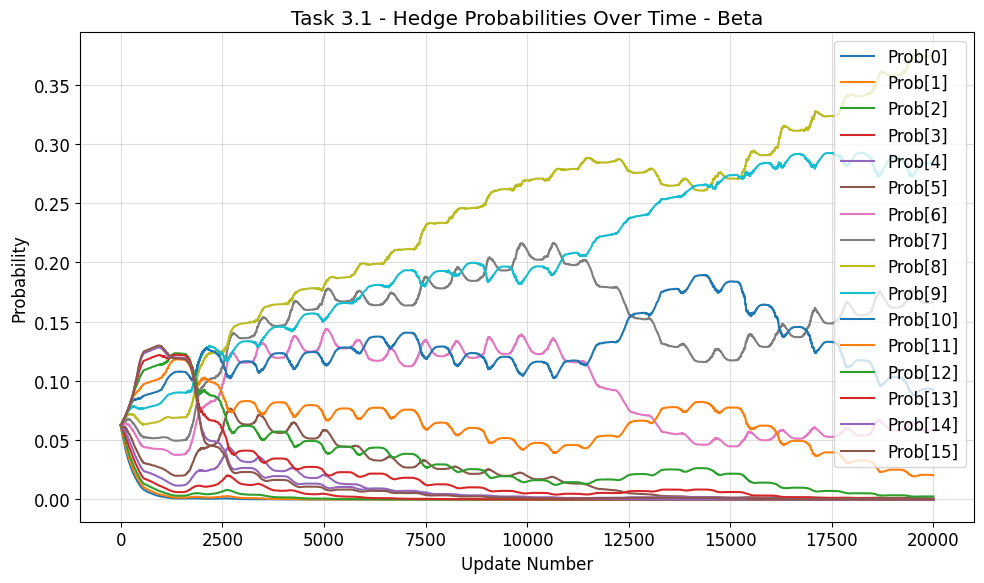


Plot per distribuzione Sinusoidal:


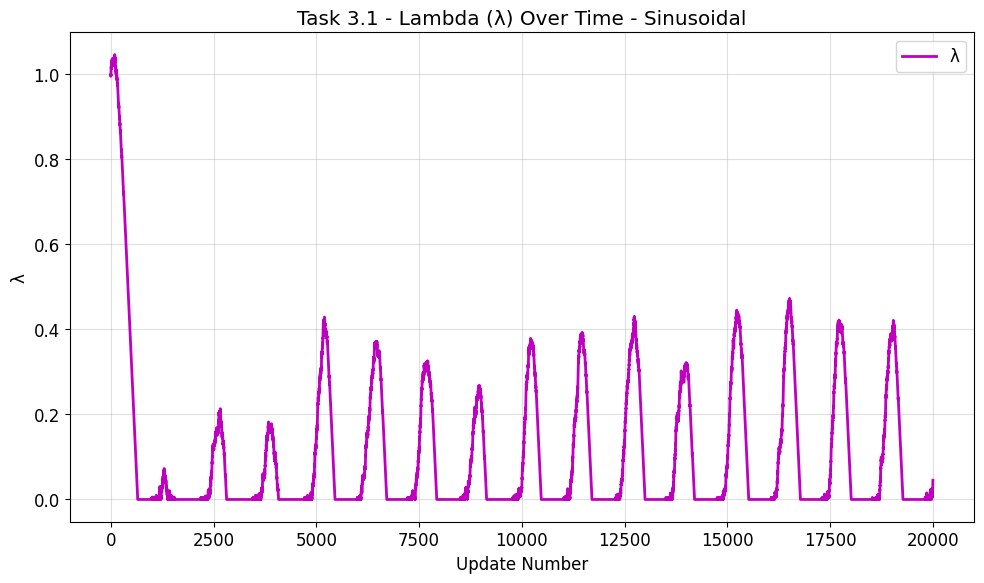

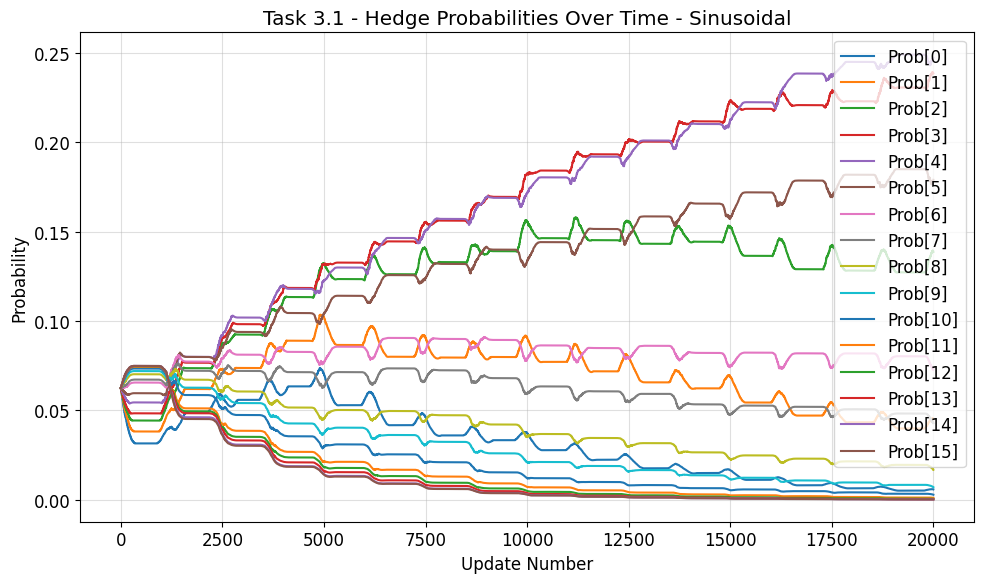


Plot per distribuzione Piecewise Beta:


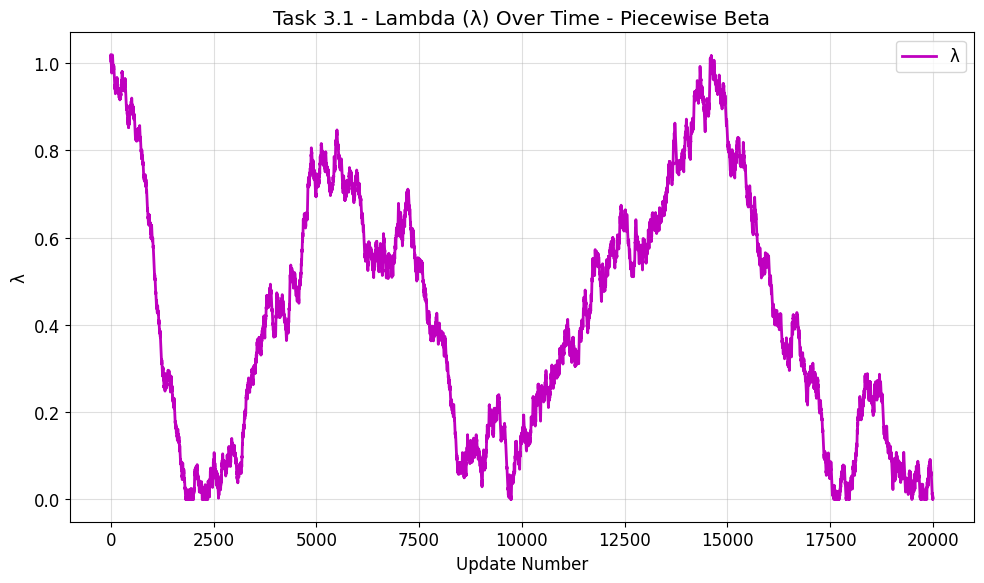

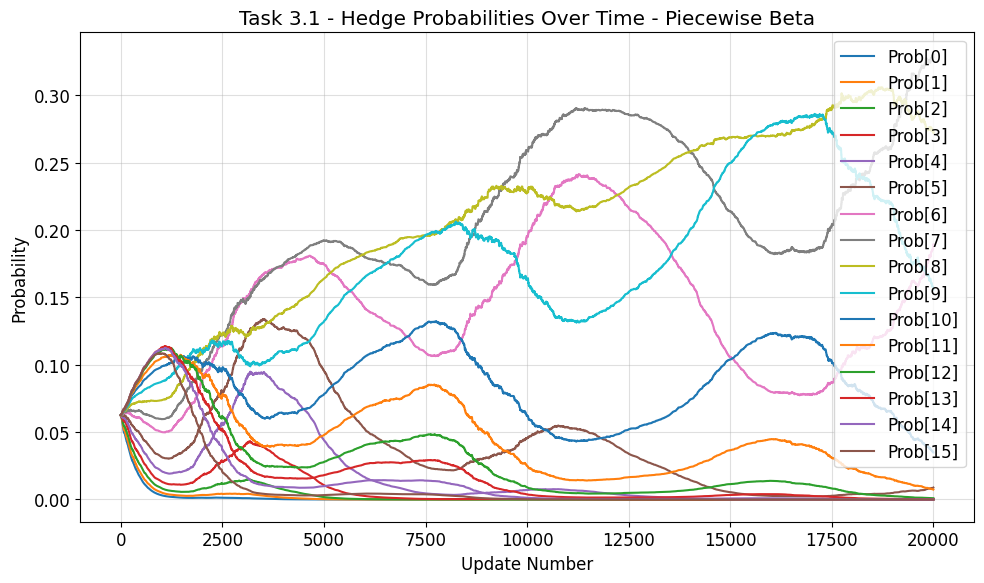


=== ANALISI DETTAGLIATA ===

--- Distribuzione Beta ---

RESULTS FOR Task 3.1 - Primal-Dual Non-Stationary Pricing (Beta)
Execution time: 0.89 seconds
Completed rounds: 20000
Average regret per round: 0.015348
Average final reward: 3662.05 ± 0.00
Efficiency vs clairvoyant: 92.3%
Average units sold: 5799.00/6000 (96.7%)

--- Distribuzione Sinusoidal ---

RESULTS FOR Task 3.1 - Primal-Dual Non-Stationary Pricing (Sinusoidal)
Execution time: 0.92 seconds
Completed rounds: 20000
Average regret per round: 0.016309
Average final reward: 1052.37 ± 0.00
Efficiency vs clairvoyant: 76.3%
Average units sold: 2811.00/6000 (46.9%)

--- Distribuzione Piecewise Beta ---

RESULTS FOR Task 3.1 - Primal-Dual Non-Stationary Pricing (Piecewise Beta)
Execution time: 0.91 seconds
Completed rounds: 20000
Average regret per round: 0.013229
Average final reward: 3480.01 ± 0.00
Efficiency vs clairvoyant: 92.9%
Average units sold: 5789.00/6000 (96.5%)

=== CONFRONTO FINALE ===
Beta: Final Average Regret = 306.9

In [44]:
class Task3_1_Runner(StandardExperimentRunner):
    """Primal-Dual Non-Stationary Pricing experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.prices = config.prices
        self.shock_prob = 0.05 #extra parameter for non-stationarity
        self.freq = 50
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = NonStationaryBudgetedPricingEnvironment(
            self.prices, self.config.horizon, self.shock_prob, self.freq,num_regimes=int(config.horizon / 4), distribution=self.distribution, rng=rng
        )
        return self.env

    def create_agent(self):
        eta = 1 / np.sqrt(self.config.horizon)
        
        self.agent = FFPrimalDualPricingAgent(
            self.prices, self.config.horizon, self.config.budget, eta=eta)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        """Compute clairvoyant reward - override for specific tasks"""
        sell_probabilities = self.env.compute_sell_probabilities()
        exp_util, gamma, exp_cost = compute_clairvoyant_single_product(
            self.prices, sell_probabilities, self.config.budget, self.config.horizon
        )

        return exp_util

price_grid = create_default_prices()
config = ExperimentConfig(
    task_name="Task 3.1 - Primal-Dual Non-Stationary Pricing",
    horizon=20_000,
    n_trials=1,
    seed=17,
    budget=6_000,
    prices=price_grid,
    distribution=[Distribution.BETA_SINUSOIDAL, Distribution.UNIFORM_SINUSOIDAL, Distribution.PIECEWISE_BETA]
)

print(f"Task 3.1 - Primal-Dual Non-Stationary Pricing")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Shock probability: {0.50}, Frequency: {300}")
print(f"Prices: {len(price_grid)} from {price_grid[0]:.3f} to {price_grid[-2]:.3f}")

multi_runner = MultiDistributionRunner(Task3_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 3.1 - Lambda (λ) Over Time - {name}")
    
    StandardPlotter.plot_hedge_probabilities(
        result.final_agents[0], title=f"Task 3.1 - Hedge Probabilities Over Time - {name}")

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## <a id="task3_2"></a>Task 3.2: Primal-Dual Non-Stationary Pricing

Implementation of Full-Feedback Primal-Dual for non-stationary environments with adversarial shocks.


Task 3.2 - Primal-Dual Non-Stationary Pricing
Budget: 3000, Horizon: 10000
Shock probability: 0.5, Frequency: 300
Prices: 16 from 0.200 to 0.980

=== Eseguendo esperimento con distribuzione Beta ===
Running Task 3.2 - Primal-Dual Non-Stationary Pricing (Beta)
Horizon: 10000, Trials: 3
Trial 1/3... Expected utility: 0.1994
Optimal distribution (gamma): [0.         0.         0.         0.         0.         0.
 0.         0.         0.58024691 0.41975309 0.         0.
 0.         0.         0.         0.        ]
Expected cost: 0.3000
Trial 1: Agent stopped at round 8203. ✓
Trial 2/3... Expected utility: 0.1980
Optimal distribution (gamma): [0.         0.         0.         0.         0.         0.
 0.         0.         0.67215815 0.32784185 0.         0.
 0.         0.         0.         0.        ]
Expected cost: 0.3000
Trial 2: Agent stopped at round 8232. ✓
Trial 3/3... Expected utility: 0.1979
Optimal distribution (gamma): [0.         0.         0.         0.         0.         0.

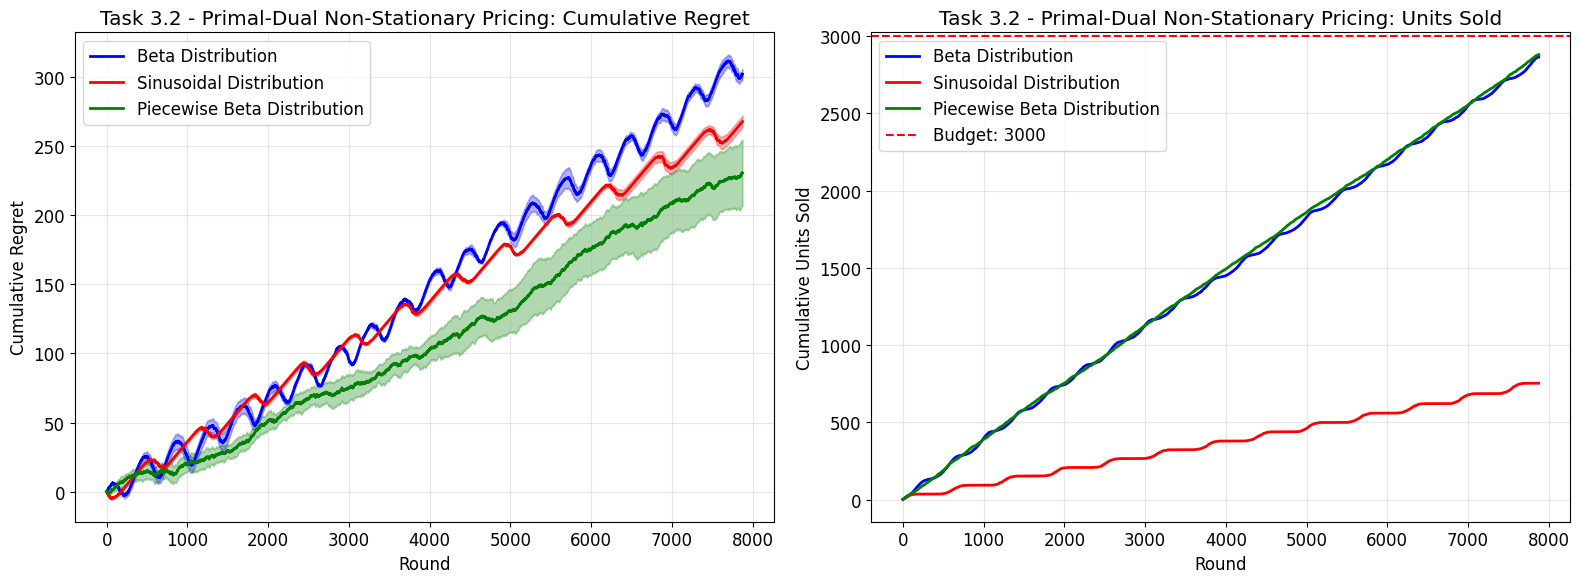


=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===

Plot per distribuzione Beta:


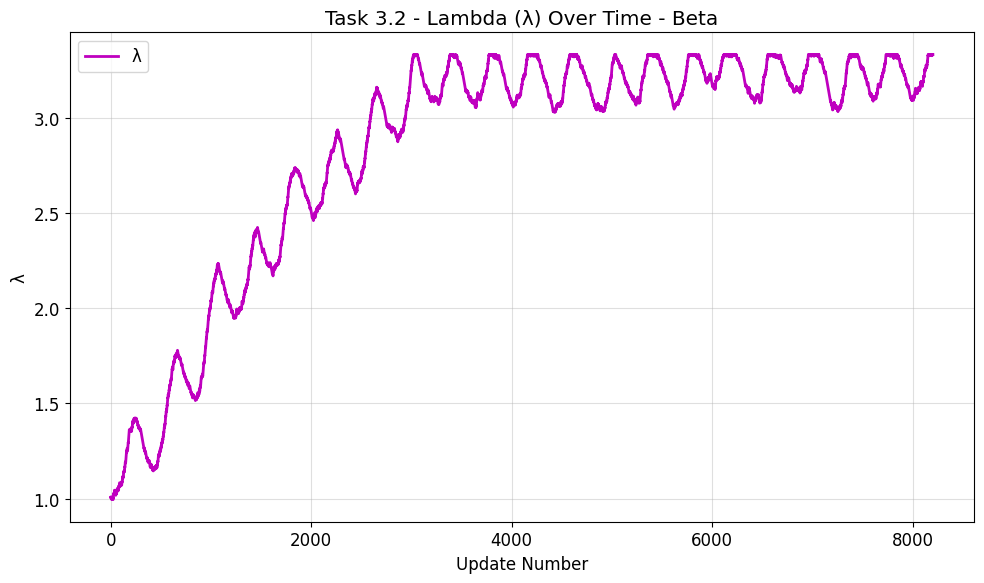

No hedge history recorded in the agent.

Plot per distribuzione Sinusoidal:


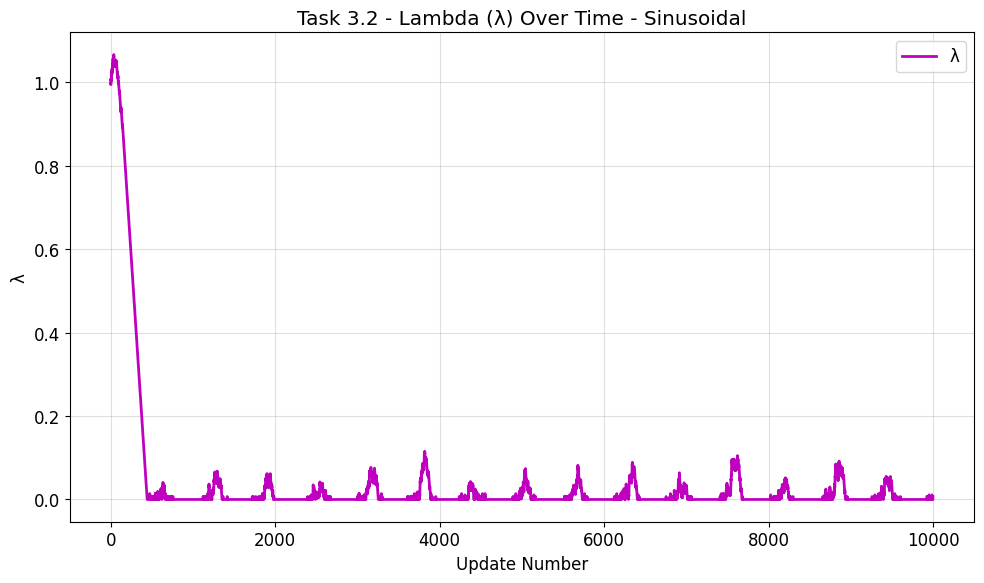

No hedge history recorded in the agent.

Plot per distribuzione Piecewise Beta:


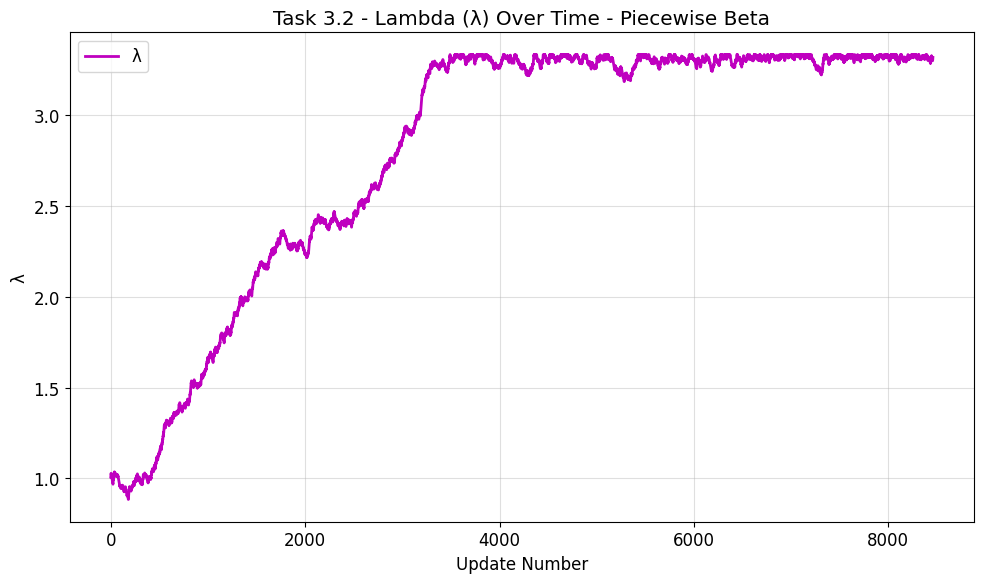

No hedge history recorded in the agent.

=== ANALISI DETTAGLIATA ===

--- Distribuzione Beta ---

RESULTS FOR Task 3.2 - Primal-Dual Non-Stationary Pricing (Beta)
Execution time: 1.95 seconds
Completed rounds: 8203
Average regret per round: 0.038739
Average final reward: 1319.18 ± 9.46
Efficiency vs clairvoyant: 81.2%
Average units sold: 3000.00/3000 (100.0%)

--- Distribuzione Sinusoidal ---

RESULTS FOR Task 3.2 - Primal-Dual Non-Stationary Pricing (Sinusoidal)
Execution time: 2.17 seconds
Completed rounds: 10000
Average regret per round: 0.034164
Average final reward: 349.65 ± 10.94
Efficiency vs clairvoyant: 50.4%
Average units sold: 957.33/3000 (31.9%)

--- Distribuzione Piecewise Beta ---

RESULTS FOR Task 3.2 - Primal-Dual Non-Stationary Pricing (Piecewise Beta)
Execution time: 1.94 seconds
Completed rounds: 7876
Average regret per round: 0.030989
Average final reward: 1313.98 ± 16.86
Efficiency vs clairvoyant: 87.7%
Average units sold: 3000.00/3000 (100.0%)

=== CONFRONTO FINAL

In [64]:
class Task3_2_Runner(StandardExperimentRunner):
    """Primal-Dual Non-Stationary Pricing experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.prices = config.prices
        self.shock_prob = 0.05
        self.freq = 50
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = NonStationaryBudgetedPricingEnvironment(
            self.prices, self.config.horizon, self.shock_prob, self.freq,
            num_regimes= int(self.config.horizon / 4), rng=rng, distribution=self.distribution
        )
        return self.env

    def create_agent(self):
        self.agent = BanditFeedbackPrimalDual(
            self.prices, self.config.horizon, self.config.budget)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        """Compute clairvoyant reward - override for specific tasks"""
        sell_probabilities = self.env.compute_sell_probabilities()
        exp_util, gamma, exp_cost = compute_clairvoyant_single_product(
            self.prices, sell_probabilities, self.config.budget, self.config.horizon
        )
        return exp_util

price_grid = create_default_prices()
config = ExperimentConfig(
    task_name="Task 3.2 - Primal-Dual Non-Stationary Pricing",
    horizon=10_000,
    n_trials=3,
    seed=17,
    budget=3_000,
    prices=price_grid,
    distribution=[Distribution.BETA_SINUSOIDAL, Distribution.UNIFORM_SINUSOIDAL, Distribution.PIECEWISE_BETA]
)

print(f"Task 3.2 - Primal-Dual Non-Stationary Pricing")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Shock probability: {0.50}, Frequency: {300}")
print(f"Prices: {len(price_grid)} from {price_grid[0]:.3f} to {price_grid[-2]:.3f}")

multi_runner = MultiDistributionRunner(Task3_2_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 3.2 - Lambda (λ) Over Time - {name}")
    
    if hasattr(result.final_agents[0], 'hedge_weight_history'):
        StandardPlotter.plot_hedge_probabilities(
            result.final_agents[0], title=f"Task 3.2 - Hedge Probabilities Over Time - {name}")
    else:
        print(f"Hedge probabilities non disponibili per {name} (Bandit Feedback)")

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## Task 4.1: Multi-Product Primal-Dual

Implementazione di Multi-Product Full-Feedback Primal-Dual per ambienti correlati multi-prodotto.


Task 4.1 - Multi-Product Primal-Dual
Products: 4, Budget: 8000, Horizon: 10000
Prices: 16 from 0.200 to 0.980
Correlation parameters: μ₀=0.5, ρ₀=0.6

=== Eseguendo esperimento con distribuzione Simple TV ===
Running Task 4.1 - Multi-Product Primal-Dual (Simple TV)
Horizon: 10000, Trials: 1
Trial 1/1... Expected utility: 0.4830
Optimal distribution (gamma): [[ 0.         0.         0.         0.         0.         0.
   0.         1.         0.         0.         0.         0.
   0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.6037464  0.3962536  0.         0.         0.
   0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         1.        -0.         0.         0.         0.
   0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.        -0.         1.         0.  

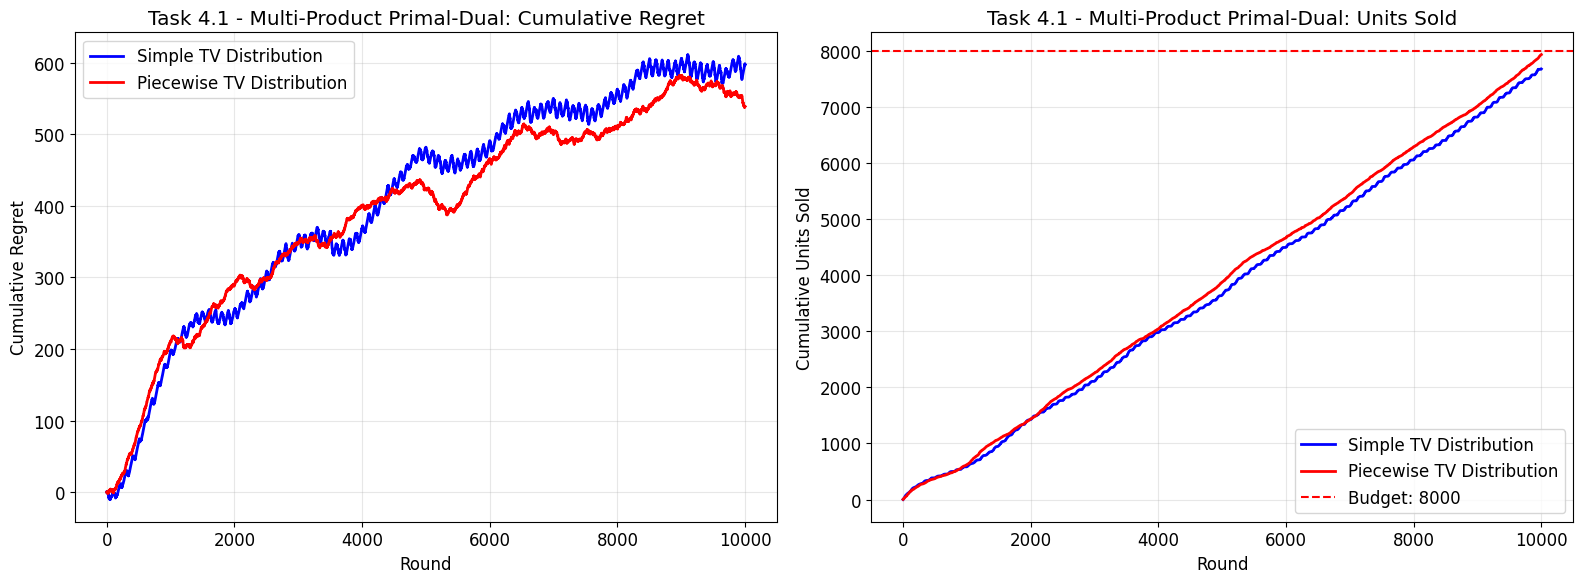


=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===

Plot per distribuzione Simple TV:


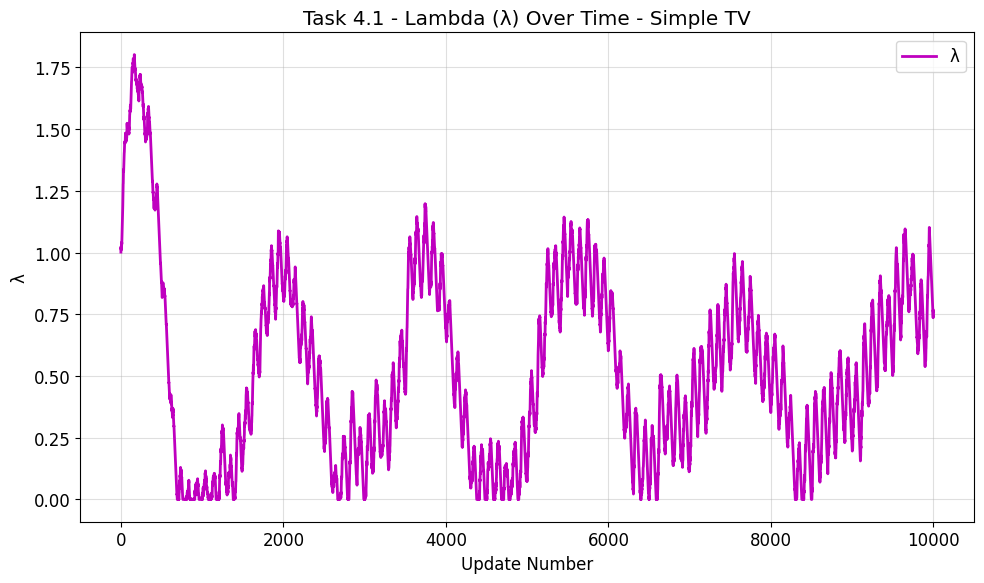

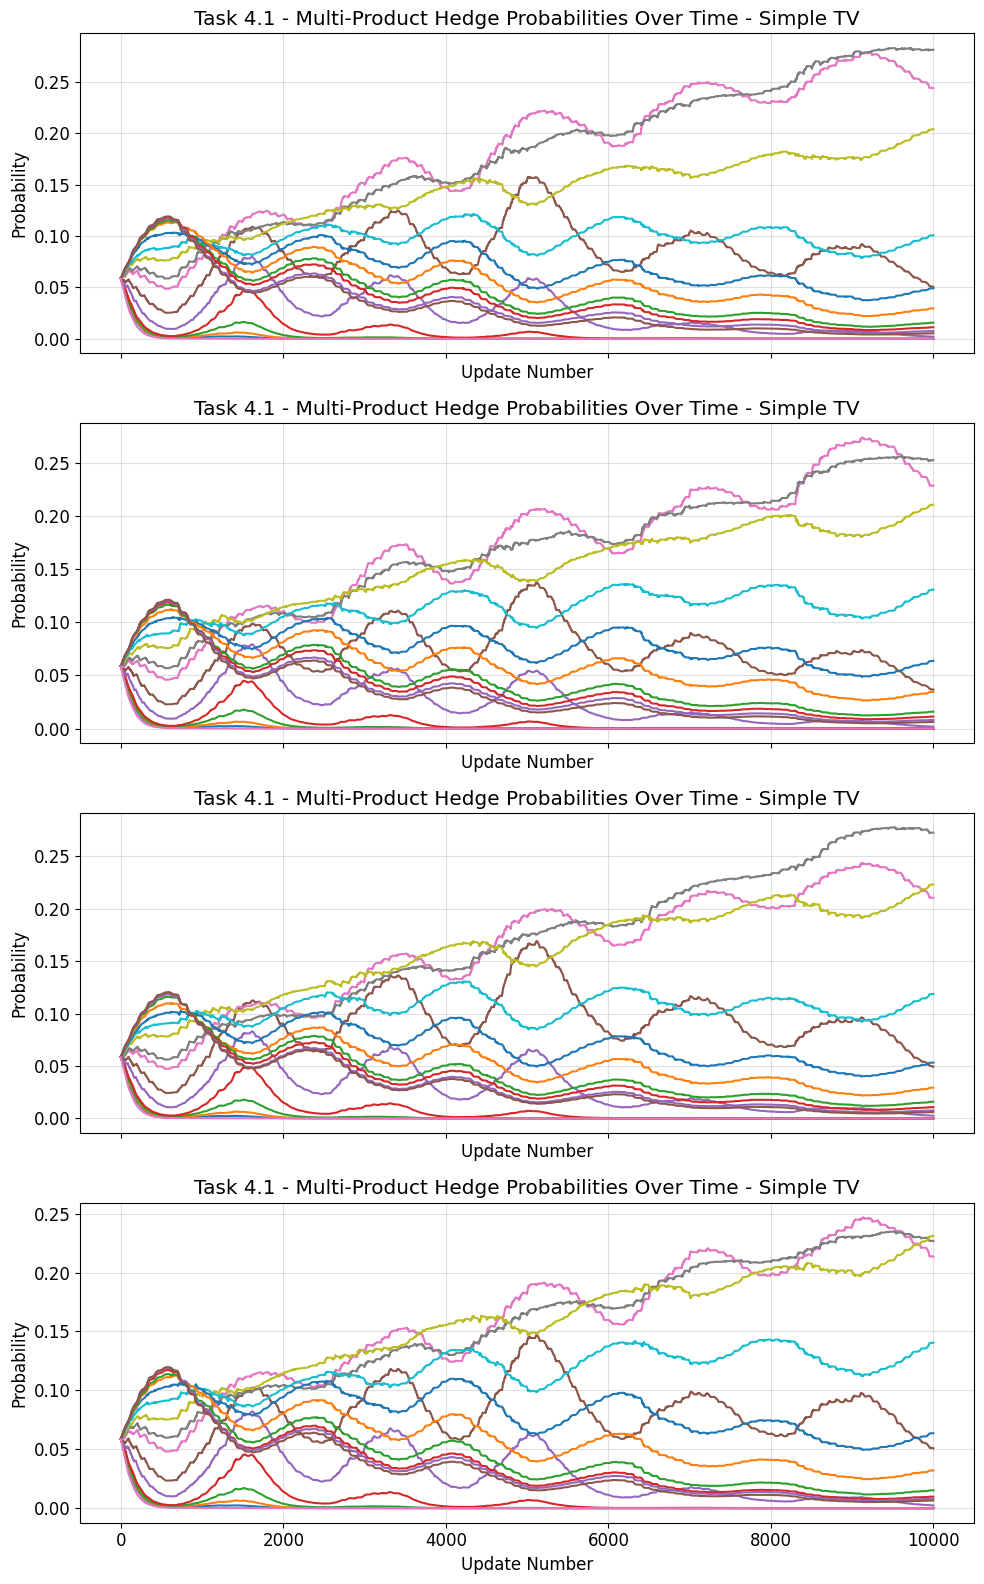


Plot per distribuzione Piecewise TV:


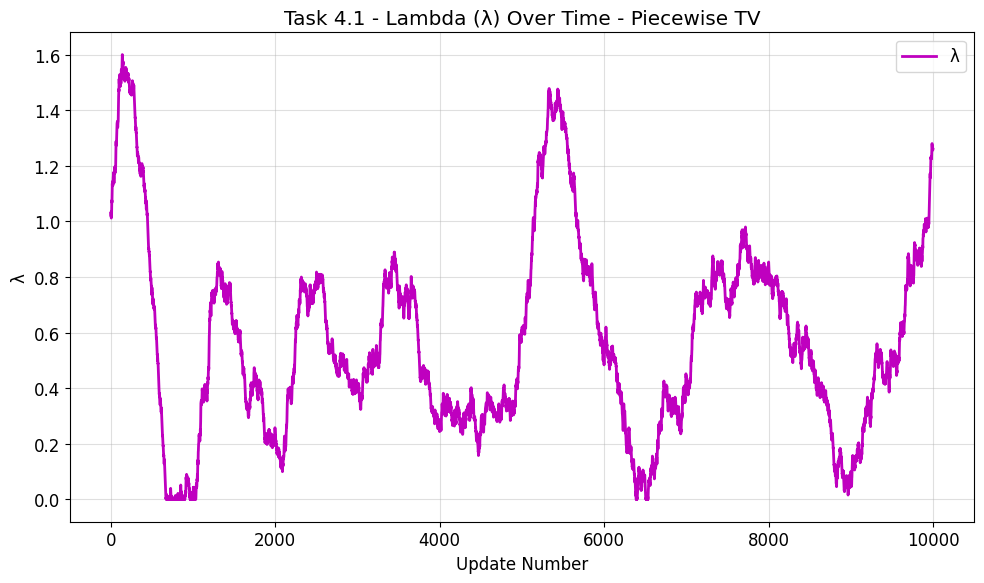

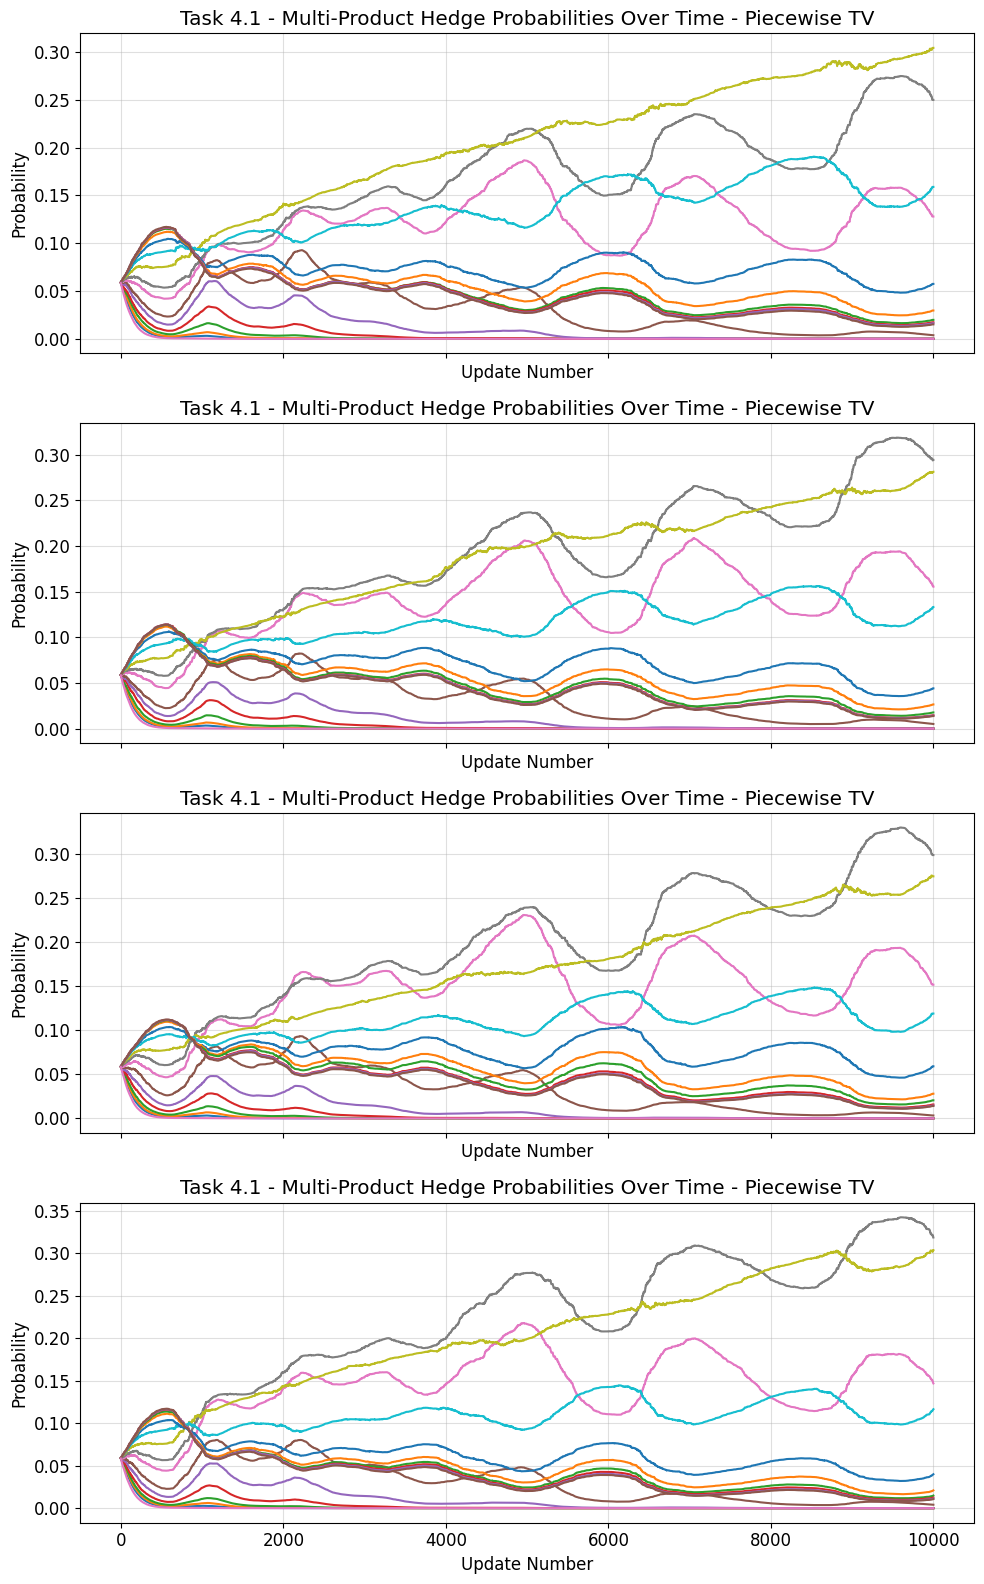


=== ANALISI DETTAGLIATA ===

--- Distribuzione Simple TV ---

RESULTS FOR Task 4.1 - Multi-Product Primal-Dual (Simple TV)
Execution time: 2.73 seconds
Completed rounds: 10000
Average regret per round: 0.059708
Average final reward: 4233.03 ± 0.00
Efficiency vs clairvoyant: 87.6%
Average units sold: 7672.00/8000 (95.9%)

--- Distribuzione Piecewise TV ---

RESULTS FOR Task 4.1 - Multi-Product Primal-Dual (Piecewise TV)
Execution time: 2.64 seconds
Completed rounds: 10000
Average regret per round: 0.053880
Average final reward: 4537.39 ± 0.00
Efficiency vs clairvoyant: 89.4%
Average units sold: 7929.00/8000 (99.1%)

=== CONFRONTO FINALE ===
Simple TV: Final Average Regret = 597.0833, Final Average Reward = 4233.0300
Piecewise TV: Final Average Regret = 538.8018, Final Average Reward = 4537.3890


In [56]:
class Task4_1_Runner(StandardExperimentRunner):
    """Multi-Product Primal-Dual experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.n_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.n_products)
        ]
        self.distribution = config.distribution
        
        self.phi = 0.0
        self.mu0, self.A, self.f = 0.5, 0.1, 100
        self.sigma0, self.A_sigma, self.phi_sigma, self.rho0 = 0.1, 0.1, 0, 0.6

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        valuation_params = {
            'mu0': self.mu0, 'A': self.A, 'f': self.f, 'phi': self.phi,
            'sigma0': self.sigma0, 'A_sigma': self.A_sigma, 'phi_sigma': self.phi_sigma, 'rho0': self.rho0,
            'num_regimes': self.config.horizon // 4
        }
        self.env = MultiProductBudgetedPricingEnvironment(self.config.horizon, self.n_products, valuation_params, distribution=self.distribution, rng=rng)
        return self.env

    def create_agent(self) -> MultiProductFFPrimalDualPricingAgent:
        eta = 1 / np.sqrt(self.config.horizon)
        self.agent = MultiProductFFPrimalDualPricingAgent(self.price_grid, self.config.horizon, self.config.budget, self.n_products, eta)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        exp_util, gamma, exp_cost = compute_extended_clairvoyant(
            self.env.valuations, self.price_grid[0], self.config.budget)
        return exp_util

prices = create_default_prices()
config = ExperimentConfig(
    task_name="Task 4.1 - Multi-Product Primal-Dual",
    horizon=10_000,
    n_trials=1,
    seed=42,
    budget=8_000,
    prices=prices,
    n_products=4,
    distribution=[Distribution.SIMPLE_TV, Distribution.PIECEWISE_TV]
)

print(f"Task 4.1 - Multi-Product Primal-Dual")
print(f"Products: 4, Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices: {len(prices)} from {prices[0]:.3f} to {prices[-2]:.3f}")
print(f"Correlation parameters: μ₀=0.5, ρ₀=0.6")

multi_runner = MultiDistributionRunner(Task4_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 4.1 - Lambda (λ) Over Time - {name}")
    
    StandardPlotter.plot_multi_hedge_probabilities(
        result.final_agents[0], 
        title=f"Task 4.1 - Multi-Product Hedge Probabilities Over Time - {name}")

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## Task 4.2: Multi-Product Primal-Dual

Implementazione di Multi-Product Full-Feedback Primal-Dual per ambienti correlati multi-prodotto.

[autoreload of agents failed: Traceback (most recent call last):
  File "c:\Users\39340\OneDrive\Desktop\OLAProject\.venv\Lib\site-packages\IPython\extensions\autoreload.py", line 322, in check
    elif self.deduper_reloader.maybe_reload_module(m):
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\39340\OneDrive\Desktop\OLAProject\.venv\Lib\site-packages\IPython\extensions\deduperreload\deduperreload.py", line 524, in maybe_reload_module
    new_source_code = f.read()
                      ^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in position 19982: character maps to <undefined>
]


Task 4.2 - Multi-Product Primal-Dual
Products: 3, Budget: 9000, Horizon: 10000
Prices: 16 from 0.200 to 0.980
Correlation parameters: μ₀=0.5, ρ₀=0.6

=== Eseguendo esperimento con distribuzione Piecewise TV ===
Running Task 4.2 - Multi-Product Primal-Dual (Piecewise TV)
Horizon: 10000, Trials: 1
Trial 1/1... Expected utility: 0.5256
Optimal distribution (gamma): [[0.         0.         0.         0.         0.         0.
  0.33540373 0.66459627 0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]]
Expected cost: 0.9000
Trial 1: Agent stopped at round 9380. ✓
Expected utility: 0.5256
Optimal distr

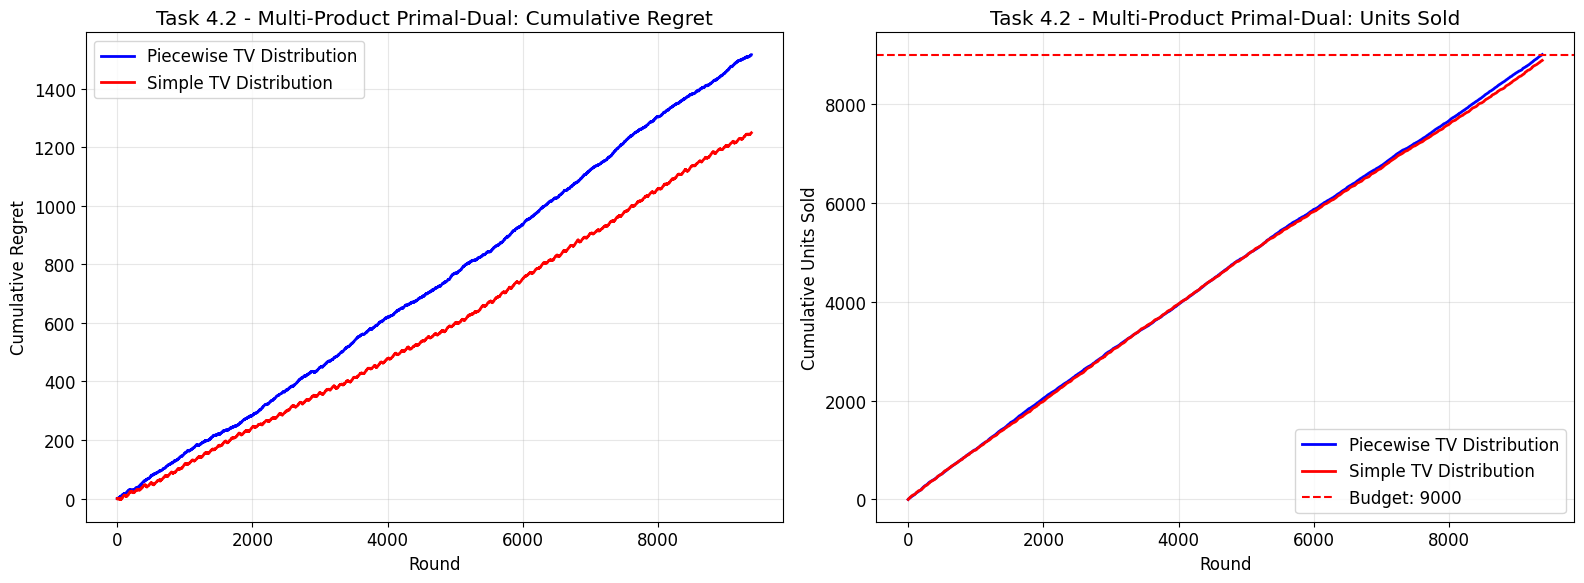


=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===

Plot per distribuzione Piecewise TV:


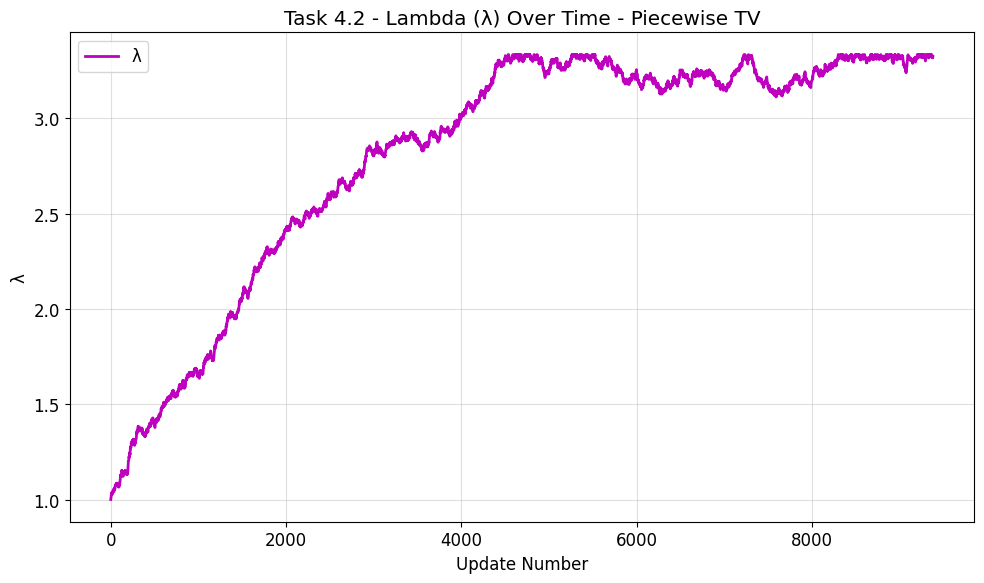

Multi-hedge probabilities non disponibili per Piecewise TV (EXP3.P Bandit Feedback)

Plot per distribuzione Simple TV:


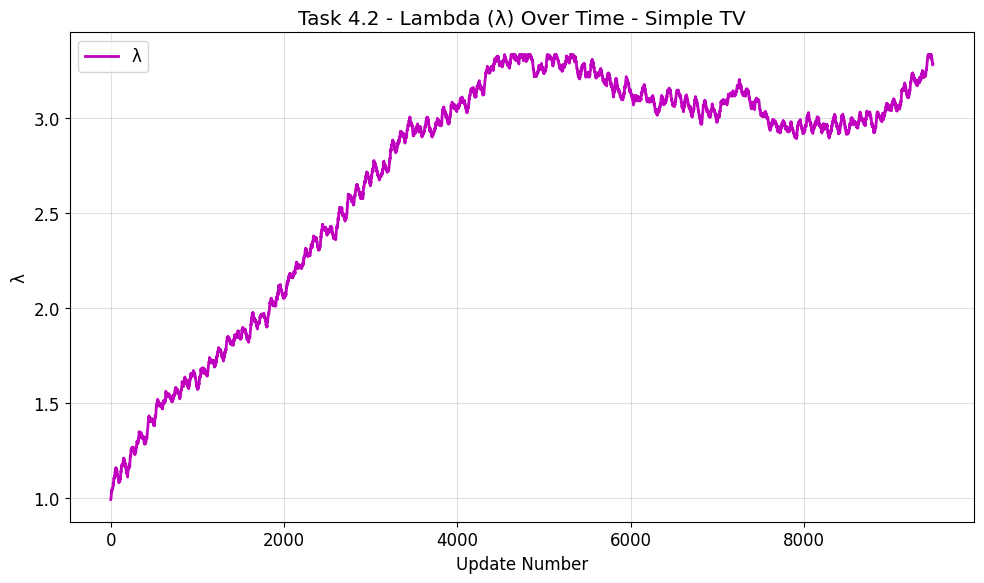

Multi-hedge probabilities non disponibili per Simple TV (EXP3.P Bandit Feedback)

=== ANALISI DETTAGLIATA ===

--- Distribuzione Piecewise TV ---

RESULTS FOR Task 4.2 - Multi-Product Primal-Dual (Piecewise TV)
Execution time: 2.55 seconds
Completed rounds: 9380
Average regret per round: 0.161582
Average final reward: 3414.53 ± 0.00
Efficiency vs clairvoyant: 69.3%
Average units sold: 9001.00/9000 (100.0%)

--- Distribuzione Simple TV ---

RESULTS FOR Task 4.2 - Multi-Product Primal-Dual (Simple TV)
Execution time: 2.70 seconds
Completed rounds: 9486
Average regret per round: 0.132287
Average final reward: 3348.67 ± 0.00
Efficiency vs clairvoyant: 72.7%
Average units sold: 9000.00/9000 (100.0%)

=== CONFRONTO FINALE ===
Piecewise TV: Final Average Regret = 1515.6406, Final Average Reward = 3414.5310
Simple TV: Final Average Regret = 1254.8724, Final Average Reward = 3348.6720


In [63]:
class Task4_2_Runner(StandardExperimentRunner):
    """Multi-Product Primal-Dual experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.n_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.n_products)
        ]
        self.distribution = config.distribution

        self.phi = 0.0
        self.mu0, self.A, self.f = 0.5, 0.1, 100
        self.sigma0, self.A_sigma, self.phi_sigma, self.rho0 = 0.1, 0.1, 0, 0.6

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        valuation_params = {
            'mu0': self.mu0, 'A': self.A, 'f': self.f, 'phi': self.phi,
            'sigma0': self.sigma0, 'A_sigma': self.A_sigma, 'phi_sigma': self.phi_sigma, 'rho0': self.rho0,
            'num_regimes': self.config.horizon // 4
        }
        self.env = MultiProductBudgetedPricingEnvironment(
            self.config.horizon, self.n_products, valuation_params, distribution=self.distribution, rng=rng
        )
        return self.env

    def create_agent(self) -> MultiProductPDExp3PricingAgent:
        eta = 1 / np.sqrt(self.config.horizon)
        self.agent = MultiProductPDExp3PricingAgent(
            self.price_grid, self.config.horizon, self.config.budget, self.n_products, eta)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        exp_util, gamma, exp_cost = compute_extended_clairvoyant(
            self.env.valuations, self.price_grid[0], self.config.budget)
        return exp_util

prices = create_default_prices()
config = ExperimentConfig(
    task_name="Task 4.2 - Multi-Product Primal-Dual",
    horizon=10_000,
    n_trials=1,
    seed=42,
    budget=9_000,
    prices=prices,
    n_products=3,
    distribution=[Distribution.PIECEWISE_TV, Distribution.SIMPLE_TV]
)

print(f"Task 4.2 - Multi-Product Primal-Dual")
print(f"Products: {config.n_products}, Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices: {len(prices)} from {prices[0]:.3f} to {prices[-2]:.3f}")
print(f"Correlation parameters: μ₀=0.5, ρ₀=0.6")

multi_runner = MultiDistributionRunner(Task4_2_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 4.2 - Lambda (λ) Over Time - {name}")
    
    if hasattr(result.final_agents[0], 'hedge_prob_history'):
        StandardPlotter.plot_multi_hedge_probabilities(
            result.final_agents[0], 
            title=f"Task 4.2 - Multi-Product Hedge Probabilities Over Time - {name}")
    else:
        print(f"Multi-hedge probabilities non disponibili per {name} (EXP3.P Bandit Feedback)")

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## Task 5.1: Sliding Window per Non-Stazionarietà

Implementazione di Constrained Combinatorial UCB con Sliding Window per adattamento locale a cambiamenti.


Task 5.1 - Smooth Multi-Product Pricing
Products: 3, Temporal windows: 4
Budget: 40000, Horizon: 30000
Prices per product: 16

=== Eseguendo esperimento con distribuzione Smooth ===
Running Task 5.1 - Smooth Multi-Product Pricing (Smooth)
Horizon: 30000, Trials: 1
Trial 1/1... Expected utility: 0.7192
Optimal distribution (gamma): [[ 0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          1.         -0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.00852878  0.99147122  0.          0.          0.          0.
   0.          0.          0.          0.        ]]
Expected cost: 1.3333
Trial 1: Agent stopped at round 21615. ✓
Expected utility: 0.7192
Optimal distribution (gamma):

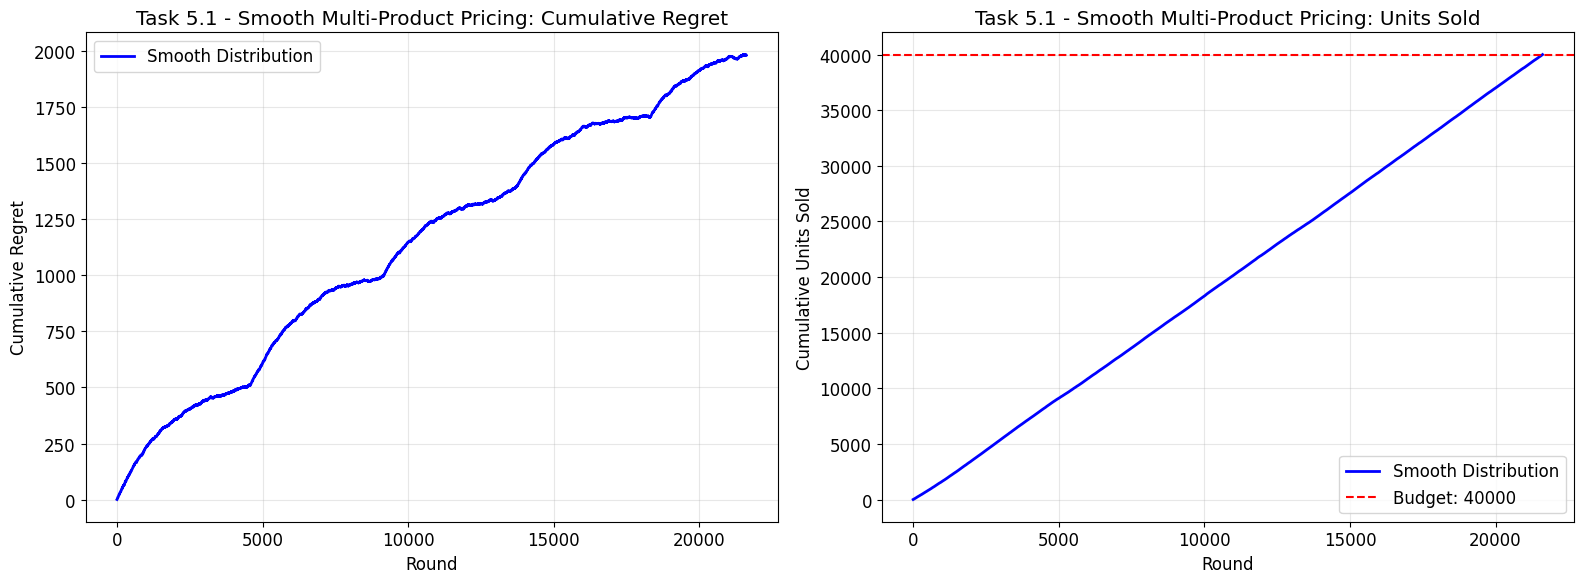


=== ANALISI DETTAGLIATA ===

--- Distribuzione Smooth ---

RESULTS FOR Task 5.1 - Smooth Multi-Product Pricing (Smooth)
Execution time: 153.20 seconds
Completed rounds: 21615
Average regret per round: 0.091706
Average final reward: 13563.14 ± 0.00
Efficiency vs clairvoyant: 87.2%
Average units sold: 40002.00/40000 (100.0%)

=== CONFRONTO FINALE ===
Smooth: Final Average Regret = 1982.2260, Final Average Reward = 13563.1429


In [62]:
class Task5_1_Runner(StandardExperimentRunner):
    """Smooth Multi-Product Pricing with Sliding Window UCB"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.N_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.N_products)
        ]
        self.num_windows = config.n_windows
        self.window_size = np.sqrt(self.config.horizon)
        self.window_size = int(
            (config.horizon * np.log(config.horizon)) ** (2/3))
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = SmoothMultiProductPricingEnvironment(
            self.price_grid, self.config.horizon, rng=rng, 
            distribution=self.distribution, n_products=self.N_products, 
            num_windows=self.num_windows
        )
        return self.env

    def create_agent(self):
        self.agent = SlidingWindowConstrainedCombinatorialUCBAgent(
            self.price_grid, self.config.budget, self.config.horizon,
            window_size=self.window_size
        )
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        full_prices = self.price_grid[0]
        self.clairvoyant_reward, self.simplex, self.expected_cost = compute_extended_clairvoyant(
            self.env.valuations, full_prices, self.config.budget
        )
        return self.clairvoyant_reward

    def extract_metrics(self, result) -> Tuple[float, float]:
        rewards, costs, _ = result
        return float(np.sum(rewards)), float(np.sum(costs))

    def run_single_trial(self, trial: int) -> Tuple[List[float], List[int], float, Any]:
        """Run a single trial and return regrets, units sold, final reward, and final agent"""
        trial_seed = self.config.seed + trial
        np.random.seed(trial_seed)

        self.env = self.create_environment(trial_seed)
        self.agent = self.create_agent()

        regrets = []
        units_sold = []
        cum_reward = 0.0
        cum_regret = 0.0
        cum_units = 0.0

        clairvoyant_reward = self.compute_clairvoyant_reward()

        for t in range(self.config.horizon):
            action = self.agent.pull_arm()

            if action is None:
                print(f"Trial {trial+1}: Agent stopped at round {t}.", end=" ")
                break

            rewards, costs, _ = self.env.round(action)

            self.agent.update(rewards, costs)

            reward, cost = float(np.sum(rewards)), float(np.sum(costs))

            cum_reward += reward
            cum_units += cost

            instant_regret = clairvoyant_reward - reward
            cum_regret += instant_regret

            regrets.append(cum_regret)
            units_sold.append(int(cum_units))

        return regrets, units_sold, cum_reward, self.agent


base_prices = np.linspace(0, 1, 15)

config = ExperimentConfig(
    task_name="Task 5.1 - Smooth Multi-Product Pricing",
    horizon=30_000,
    n_trials=1,
    seed=18,
    budget=40_000,
    prices=base_prices,
    n_products=3,
    n_windows=4,
    distribution=[Distribution.SMOOTH]
)

print(f"Task 5.1 - Smooth Multi-Product Pricing")
print(f"Products: {config.n_products}, Temporal windows: 4")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices per product: {len(base_prices) + 1}")

multi_runner = MultiDistributionRunner(Task5_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True)

multi_runner.print_analysis()

# 5.2 Comparison with Primal Dual Hedge

Task 5.2 - Smooth Multi-Product Pricing
Products: 3, Temporal windows: 4
Budget: 8000, Horizon: 10000
Prices per product: 16

=== Eseguendo esperimento con distribuzione Smooth ===
Running Task 5.2 - Smooth Multi-Product Pricing (Smooth)
Horizon: 10000, Trials: 1
Trial 1/1... Expected utility: 0.5080
Optimal distribution (gamma): [[ 0.          0.          0.          0.          0.          0.
   0.          0.          1.         -0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.40574215  0.59425785  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.        ]]
Expected cost: 0.8000
Trial 1/1...
Trial 1: Final reward = 4571.64
Trial 1: Budget used = 7803.0/8000 (97.5%)
Trial 1:

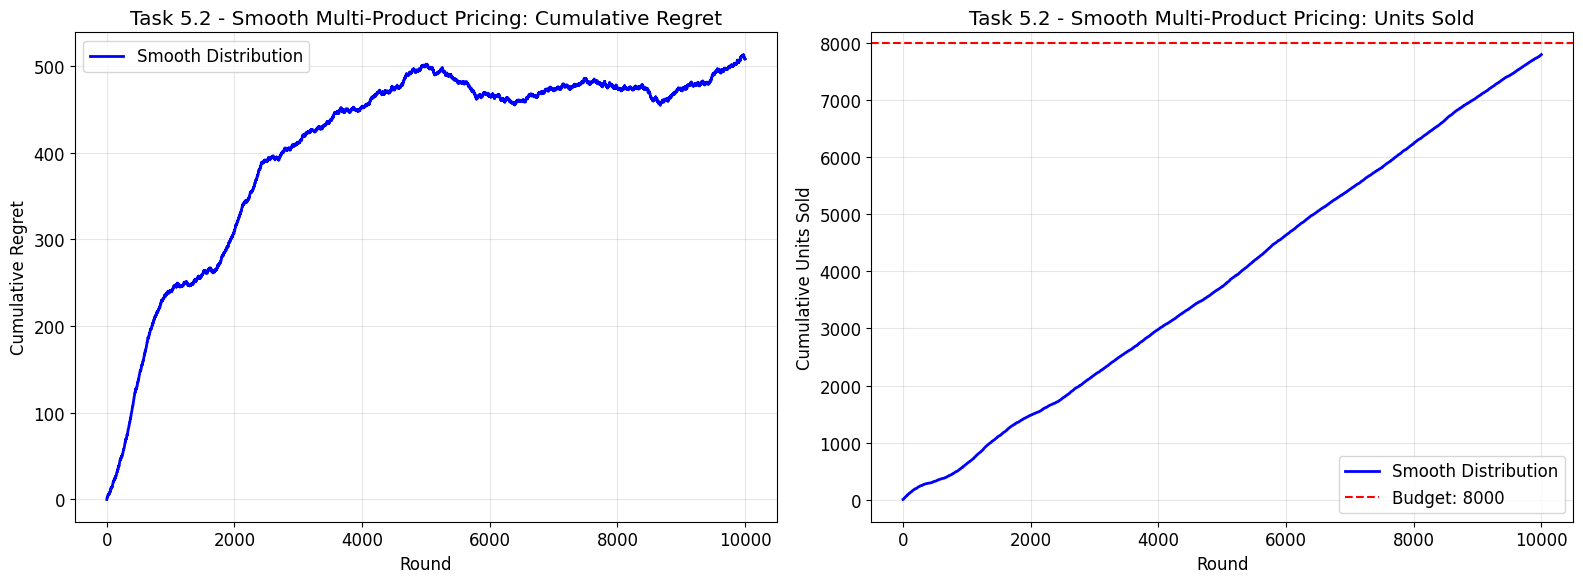


=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===

Plot per distribuzione Smooth:


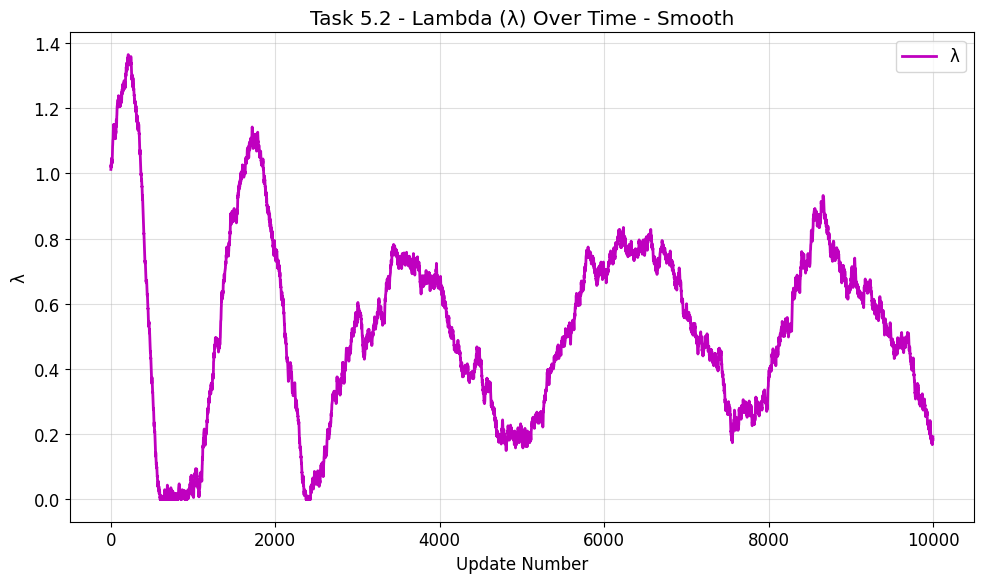

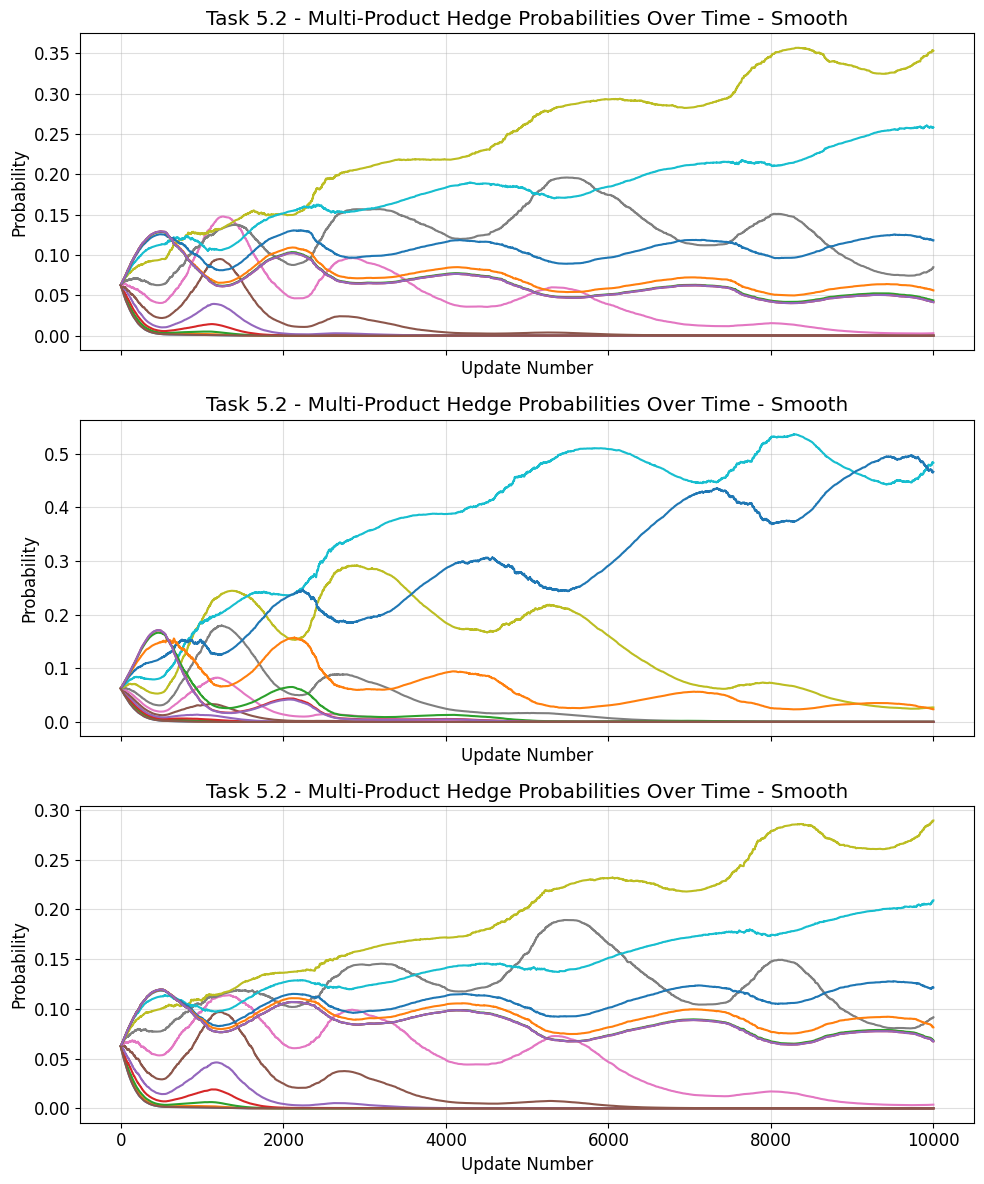

In [65]:
class Task5_2_Runner(StandardExperimentRunner):
    """Smooth Multi-Product Pricing with Sliding Window UCB"""
    
    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.N_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.N_products)
        ]
        self.num_windows = config.n_windows
        self.distribution = config.distribution
        
    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = SmoothMultiProductPricingEnvironment(
            self.price_grid, self.config.horizon, n_products=self.N_products, num_windows=self.num_windows, rng=rng, distribution=self.distribution
        )
        return self.env
        
    def create_agent(self):
        self.agent = MultiProductFFPrimalDualPricingAgent(
            self.price_grid, self.config.horizon, self.config.budget, 
            n_products = self.N_products, eta = 1 / np.sqrt(self.config.horizon)
        )
        return self.agent
        
    def compute_clairvoyant_reward(self) -> float:
        self.clair_reward, self.simplex, self.expected_cost = compute_extended_clairvoyant(
            self.env.valuations, self.price_grid[0], self.config.budget
        )
        return self.clair_reward
        
    def extract_metrics(self, result) -> Tuple[float, float]:
        rewards, costs = result
        return float(np.sum(rewards)), float(np.sum(costs))
    
    def run_single_trial(self, trial: int):
        """Custom trial runner for Task 5.2 with smooth valuation data"""
        trial_seed = self.config.seed + trial
        np.random.seed(trial_seed)
        
        env = self.create_environment(trial_seed)
        agent = self.create_agent()
        
        regrets = []
        units_sold = []
        cum_reward = 0.0
        cum_regret = 0.0
        cum_units = 0

        self.compute_clairvoyant_reward()

        
        print(f"Trial {trial+1}/{self.config.n_trials}...")
        
        for t in range(self.config.horizon):
            choice = agent.pull_arm()
            if choice is None or np.any([c is None for c in choice]):
                print(f"Trial {trial+1}: Budget exhausted at round {t}.")
                break
                
            rewards, costs, val = env.round(choice)
            
            agent.update(val)

            actual_rew = rewards.sum()
            actual_units = costs.sum()
            cum_reward += actual_rew
            
            instant_regret = self.clair_reward - actual_rew
            cum_regret += instant_regret
            cum_units += actual_units
            regrets.append(cum_regret)
            units_sold.append(int(cum_units))

        print(f"Trial {trial+1}: Final reward = {cum_reward:.2f}")
        print(f"Trial {trial+1}: Budget used = {cum_units}/{self.config.budget} ({100*cum_units/self.config.budget:.1f}%)")
        if regrets is not None and len(regrets) > 0:
            regret_per_round = cum_regret / float(len(regrets))
            print(f"Trial {trial+1}: Final regret per round = {regret_per_round:.4f}")
        else:
            print(f"Trial {trial+1}: No regret data collected")
        
        return regrets, units_sold, cum_reward, agent


base_prices = np.linspace(0, 1, 15)
config = ExperimentConfig(
    task_name="Task 5.2 - Smooth Multi-Product Pricing",
    horizon=10_000,
    n_trials=1,
    seed=18,
    budget=8_000,
    prices=base_prices,
    n_products=3,
    n_windows=4,
    distribution=[Distribution.SMOOTH]
)

print(f"Task 5.2 - Smooth Multi-Product Pricing")
print(f"Products: {config.n_products}, Temporal windows: 4")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices per product: {len(base_prices) + 1}")

multi_runner = MultiDistributionRunner(Task5_2_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 5.2 - Lambda (λ) Over Time - {name}")
    
    StandardPlotter.plot_multi_hedge_probabilities(
        result.final_agents[0], 
        title=f"Task 5.2 - Multi-Product Hedge Probabilities Over Time - {name}")

# 5.3 Comparison with Primal Dual ExP3.P

Task 5.3 - Smooth Multi-Product Pricing
Products: 3, Temporal windows: 4
Budget: 5000, Horizon: 10000
Prices per product: 16

=== Eseguendo esperimento con distribuzione Smooth ===
Running Task 5.3 - Smooth Multi-Product Pricing (Smooth)
Horizon: 10000, Trials: 1
Trial 1/1... Trial 1/1...
Expected utility: 0.3522
Optimal distribution (gamma): [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.06642729 0.93357271 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]]
Expected cost: 0.5000
Trial 1: Budget exhausted at round 4354.
Trial 1: Final reward = 1387.00
Trial 1: Budget used = 5002.0/5000 (100.0%)
Trial 1: Final

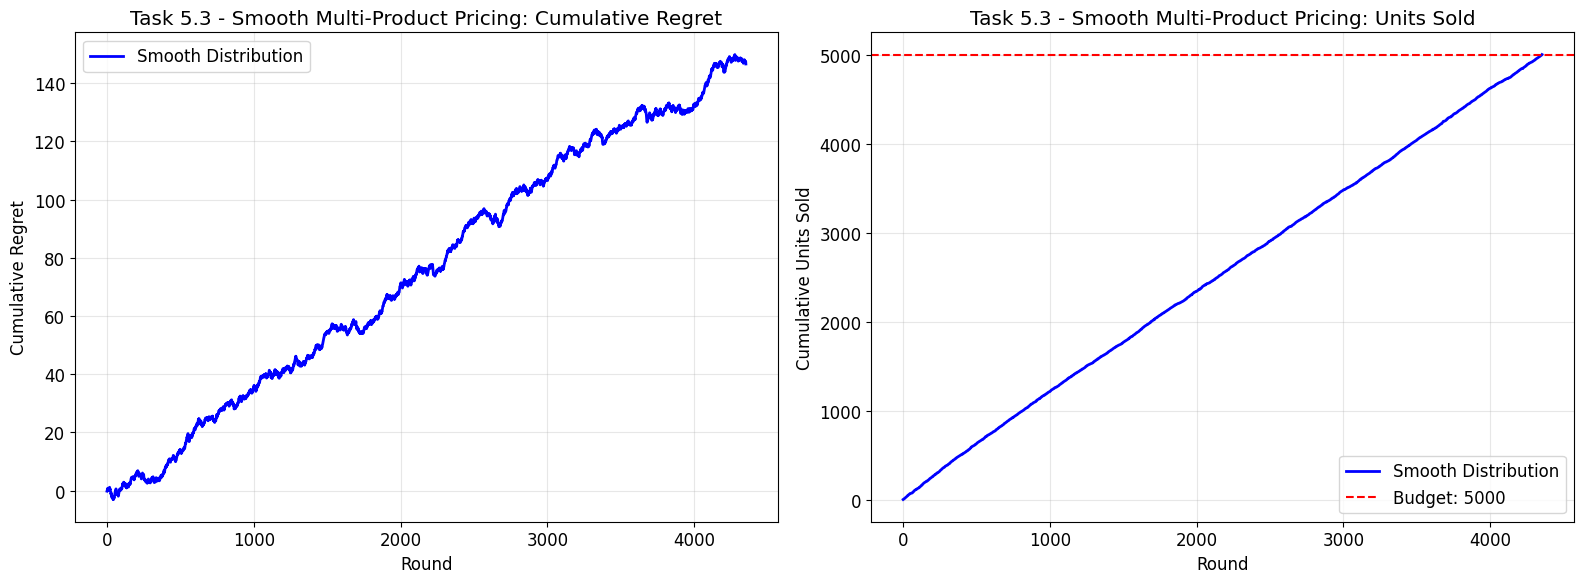


=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===

Plot per distribuzione Smooth:


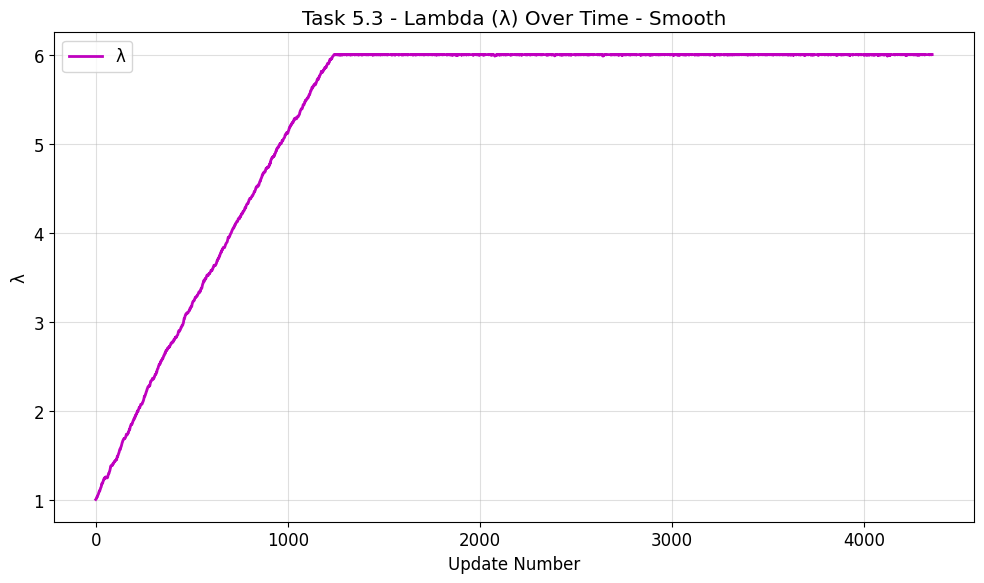

No hedge probability history recorded in the agent.

=== ANALISI DETTAGLIATA ===

--- Distribuzione Smooth ---

RESULTS FOR Task 5.3 - Smooth Multi-Product Pricing (Smooth)
Execution time: 0.87 seconds
Completed rounds: 4354
Average regret per round: 0.033673
Average final reward: 1387.00 ± 0.00
Efficiency vs clairvoyant: 90.4%
Average units sold: 5002.00/5000 (100.0%)

=== CONFRONTO FINALE ===
Smooth: Final Average Regret = 146.6140, Final Average Reward = 1387.0000


In [68]:
class Task5_3_Runner(StandardExperimentRunner):
    """Smooth Multi-Product Pricing with Sliding Window UCB"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.n_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.n_products)
        ]
        self.num_windows = config.n_windows
        self.window_size = int(
            (config.horizon * np.log(config.horizon)) ** (2/3))
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = SmoothMultiProductPricingEnvironment(
            self.price_grid, self.config.horizon, n_products=self.n_products, num_windows=self.num_windows, rng=rng, distribution=self.distribution
        )
        return self.env

    def create_agent(self):
        self.agent = MultiProductPDExp3PricingAgent(
            self.price_grid, self.config.horizon, self.config.budget,
            n_products=self.n_products
        )
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        full_prices = self.price_grid[0]
        self.clair_reward, self.simplex, self.expected_cost = compute_extended_clairvoyant(
            self.env.valuations, full_prices, self.config.budget
        )
        return self.clair_reward

    def extract_metrics(self, result) -> Tuple[float, float]:
        rewards, costs, _ = result
        return float(np.sum(rewards)), float(np.sum(costs))

    def run_single_trial(self, trial: int):
        """Custom trial runner for Task 5.3 with smooth valuation data"""
        trial_seed = self.config.seed + trial
        np.random.seed(trial_seed)

        env = self.create_environment(trial_seed)
        agent = self.create_agent()

        regrets = []
        units_sold = []
        cum_reward = 0.0
        cum_regret = 0.0
        cum_units = 0

        print(f"Trial {trial+1}/{self.config.n_trials}...")
        self.compute_clairvoyant_reward()

        for t in range(self.config.horizon):
            choice = agent.pull_arm()
            if choice is None:
                print(f"Trial {trial+1}: Budget exhausted at round {t}.")
                break

            rewards, costs, val = env.round(choice)
            agent.update(val)

            reward, cost = float(np.sum(rewards)), float(np.sum(costs))
            cum_reward += reward

            # Compute instantaneous regret
            instant_regret = self.clair_reward - reward
            cum_regret += instant_regret
            cum_units += cost
            regrets.append(cum_regret)
            units_sold.append(int(cum_units))

        print(f"Trial {trial+1}: Final reward = {cum_reward:.2f}")
        print(
            f"Trial {trial+1}: Budget used = {cum_units}/{self.config.budget} ({100*cum_units/self.config.budget:.1f}%)")
        if len(regrets) > 0:
            regret_per_round = cum_regret / float(len(regrets))
            print(
                f"Trial {trial+1}: Final regret per round = {regret_per_round:.4f}")
        else:
            print(f"Trial {trial+1}: No regret data collected")

        return regrets, units_sold, cum_reward, agent


base_prices = np.linspace(0, 1, 15)

config = ExperimentConfig(
    task_name="Task 5.3 - Smooth Multi-Product Pricing",
    horizon=10_000,
    n_trials=1,
    seed=18,
    budget=5_000,
    prices=base_prices,
    n_products=3,
    n_windows=4,
    distribution=[Distribution.SMOOTH]
)

print(f"Task 5.3 - Smooth Multi-Product Pricing")
print(f"Products: {config.n_products}, Temporal windows: 4")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices per product: {len(base_prices) + 1}")

multi_runner = MultiDistributionRunner(Task5_3_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 5.3 - Lambda (λ) Over Time - {name}")
    
    StandardPlotter.plot_multi_hedge_probabilities(
        result.final_agents[0], 
        title=f"Task 5.3 - Multi-Product Hedge Probabilities Over Time - {name}")

multi_runner.print_analysis()